# Understanding Homelessness

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather Data</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean Data</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Key Homelessness Issues
- What is homelessness and definition challenges
- Causes of homelessness
- Homelessness classifications including chronic, sheltered/un

### Point in Time Counts
- History of counts
- Methodological issues
- Rationale for category inclusions

### Data Background
- Originally was going to use a dataset from Kaggle but decided to pull straight from HUD-CoC site. 

(borrowed from: https://www.kaggle.com/bltxr9/eda-of-total-homeless-population)
This dataset was generated by CoC and provided to HUD. Note: HUD did not conduct a full data quality review on the data submitted by each CoC.

What is the [Continuum of Care (CoC) Program](https://www.hudexchange.info/programs/coc/)?

Original Data: [PIT and HIC Data Since 2007](https://www.hudexchange.info/resource/3031/pit-and-hic-data-since-2007/). Retrieved 2019-07-20.

CoC-HUD Summary Reports: [CoC Homeless Populations and Subpopulations Reports](https://www.hudexchange.info/programs/coc/coc-homeless-populations-and-subpopulations-reports/)

**Other Resources**

[Funding Awards](https://www.hudexchange.info/programs/coc/awards-by-component/)

[CoC Dashboard Reports](https://www.hudexchange.info/programs/coc/coc-dashboard-reports/)

[CoC Housing Inventory Count Reports](https://www.hudexchange.info/programs/coc/coc-housing-inventory-count-reports/)

In [39]:
# Load Python libraries
from collections import namedtuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

%matplotlib inline

<a id='gather'></a>
## Gather Data

In [38]:
year_range = np.arange(2007, 2019, 1)
year_range = [str(x) for x in year_range]

In [37]:
df_2007 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2007')
df_2008 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2008')
df_2009 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2009')
df_2010 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2010')
df_2011 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2011')
df_2012 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2012')
df_2013 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2013')
df_2014 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2014')
df_2015 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2015')
df_2016 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2016')
df_2017 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2017')
df_2018 = pd.read_excel('resources/data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2018')

Inspect to see if the column order is simply extended as the years continue.

In [42]:
df_2007.shape

(56, 30)

In [43]:
df_2007.columns[25:]

Index(['Sheltered Total Chronically Homeless Individuals, 2007',
       'Unsheltered Chronically Homeless Individuals, 2007',
       'Homeless Veterans, 2007', 'Sheltered Total Homeless Veterans, 2007',
       'Unsheltered Homeless Veterans, 2007'],
      dtype='object')

In [44]:
df_2014.columns[25:31]

Index(['Sheltered ES Chronically Homeless, 2014',
       'Sheltered SH Chronically Homeless, 2014',
       'Sheltered Total Chronically Homeless, 2014',
       'Unsheltered Chronically Homeless, 2014',
       'Chronically Homeless Individuals, 2014',
       'Sheltered ES Chronically Homeless Individuals, 2014'],
      dtype='object')

To check column differences programmatically, it is best to add years to each df and remove the `, YYYY` from the column names.

In [48]:
year_dfs = [df_2007, df_2008, df_2009, df_2010, df_2011, 
            df_2012, df_2013, df_2014, df_2015, df_2016, 
            df_2017, df_2018]

for df, year in zip(year_dfs, year_range):
    df['year'] = year
    remove_year = df.columns.str.replace(', ' + year, '')
    df.columns = remove_year

Now we can check what columns are shared and not.

In [55]:
for df in year_dfs[:-1]:
    assert df.columns.isin(df_2018.columns).sum() == df.shape[1]

Yes, each of the column names in the previous years are in the final year. Therefore, it should be possible to concat them onto each other.

In [57]:
df = df_2018.copy()

for year_df in year_dfs[:-1]:
    df = pd.concat([df, year_df], sort=True)

# Confirm that all rows have been captured
total_rows = sum([year_df.shape[0] for year_df in year_dfs])
assert df.shape[0] == total_rows

In [58]:
df.to_csv('resources/data/combined_2007_2018_data.csv', index=False)

<a id='assess'></a>
## Assess

#### Check data type and missing values

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 55
Data columns (total 83 columns):
Chronically Homeless                                       448 non-null object
Chronically Homeless Individuals                           672 non-null object
Chronically Homeless People in Families                    448 non-null object
Homeless Children of Parenting Youth                       224 non-null object
Homeless Family Households                                 672 non-null object
Homeless Individuals                                       672 non-null object
Homeless Parenting Youth (Under 25)                        224 non-null object
Homeless Parenting Youth Age 18-24                         224 non-null object
Homeless Parenting Youth Under 18                          224 non-null object
Homeless People in Families                                672 non-null object
Homeless Unaccompanied Youth (Under 25)                    224 non-null object
Homeless Unaccompanied Yout

Updated data for 2018 has separated data into "standard" emergency shelters (ES) as well as information from transitional housing and safe havens. Transitional housing (TH) is often called "second stage" housing and is time-limited housing that is often considered a "stepping stone" to more stable housing. Safe havens (SH) are facilities that are typically those supporting women and children escaping (domestic) violence.

In [81]:
missing_cols = {}
for year in year_range:
    cols_missing = df[df['year'] == year].isna().sum() == [df[df['year'] == year].shape[0]] * df.shape[1]
    missing_cols[year] = cols_missing[cols_missing].index

In [92]:
for key in missing_cols.keys():
    print(key, ':', len(missing_cols[key]))

2007 : 52
2008 : 52
2009 : 49
2010 : 49
2011 : 41
2012 : 41
2013 : 41
2014 : 38
2015 : 0
2016 : 1
2017 : 0
2018 : 0


In [93]:
missing_cols['2007'][~missing_cols['2007'].isin(missing_cols['2009'])]

Index(['Sheltered ES Chronically Homeless Individuals',
       'Sheltered SH Chronically Homeless',
       'Sheltered SH Chronically Homeless Individuals'],
      dtype='object')

In [94]:
missing_cols['2009'][~missing_cols['2009'].isin(missing_cols['2011'])]

Index(['Chronically Homeless', 'Chronically Homeless People in Families',
       'Sheltered ES Chronically Homeless',
       'Sheltered ES Chronically Homeless People in Families',
       'Sheltered Total Chronically Homeless',
       'Sheltered Total Chronically Homeless People in Families',
       'Unsheltered Chronically Homeless',
       'Unsheltered Chronically Homeless People in Families'],
      dtype='object')

In [95]:
missing_cols['2011'][~missing_cols['2011'].isin(missing_cols['2014'])]

Index(['Sheltered ES Homeless Veterans', 'Sheltered SH Homeless Veterans',
       'Sheltered TH Homeless Veterans'],
      dtype='object')

In [97]:
missing_cols['2014'][~missing_cols['2014'].isin(missing_cols['2015'])]

Index(['Homeless Children of Parenting Youth',
       'Homeless Parenting Youth (Under 25)',
       'Homeless Parenting Youth Age 18-24',
       'Homeless Parenting Youth Under 18',
       'Homeless Unaccompanied Youth (Under 25)',
       'Homeless Unaccompanied Youth Age 18-24',
       'Homeless Unaccompanied Youth Under 18',
       'Sheltered ES Homeless Children of Parenting Youth',
       'Sheltered ES Homeless Parenting Youth (Under 25)',
       'Sheltered ES Homeless Parenting Youth Age 18-24',
       'Sheltered ES Homeless Parenting Youth Under 18',
       'Sheltered ES Homeless Unaccompanied Youth (Under 25)',
       'Sheltered ES Homeless Unaccompanied Youth Age 18-24',
       'Sheltered ES Homeless Unaccompanied Youth Under 18',
       'Sheltered SH Homeless Unaccompanied Youth (Under 25)',
       'Sheltered SH Homeless Unaccompanied Youth Age 18-24',
       'Sheltered SH Homeless Unaccompanied Youth Under 18',
       'Sheltered TH Homeless Children of Parenting Youth',
     

In [96]:
missing_cols['2016'][~missing_cols['2016'].isin(missing_cols['2018'])]

Index(['Sheltered SH Homeless Unaccompanied Youth Under 18'], dtype='object')

_Observations_
- Some fields have only been collected since a certain date.
    - 2015, 2017, 2018: All fields collected
    - 2016: Missing `Sheltered SH Homeless Unaccompanied Youth Under 18`
    - 2014: Missing youth homelessness details
    - 2011 to 2013: Missing youth and sheltered veteran homelessness details
    - 2009, 2010: Missing youth, sheltered veteran and chronic homelessness details
    - 2007, 2008: Missing youth, veteran, and additional chronic homelessness details
- Data is all in object format and will need to be converted to float. 
- Not all categories are multually exclusive, confirmation is required to confirm how data is summed.

#### Check unique values

In [99]:
df[['State', 'year']].nunique()

State    56
year     12
dtype: int64

_Observations_
- There are 12 years of data contained in the set (2007 - 2018)
- I need to confirm what states are covered within state
- Because all other values are counts, there is not a concern about duplicates

In [100]:
df['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY',
       'Total'], dtype=object)

- It appears that the list includes some US territories and DC. I am less familiar with state abbreviations - will need to get state names for reference.
- For this analysis I will only be using regions that are physically located in the USA.

<a id='clean'></a>
## Clean Data

In [142]:
df = pd.read_csv('resources/data/combined_2007_2018_data.csv')
df.shape

(672, 83)

#### Add State Names

In [143]:
df_state = pd.read_csv("resources/data/states.csv")
df_state.head()

abbr        name
0   AL     Alabama
1   AK      Alaska
2   AZ     Arizona
3   AR    Arkansas
4   CA  California

In [144]:
df_clean = df.merge(df_state, left_on='State', right_on='abbr', how='left')
df_clean.drop("abbr", axis=1, inplace=True)
assert df_clean.shape[1] - df.shape[1] == 1

Check for abbreviations that still did not have state names.

In [145]:
df_clean.loc[df_clean['name'].isnull(), ['State', 'name']].groupby('State').count()

name
State      
DC        0
GU        0
MP        0
PR        0
Total     0
VI        0

It looks like I've imported a Total row unintentionally.

According to  [this site](http://www.stateabbreviations.us/) the additional details are:
- DC = Washington DC
- GU = Guam
- MP = Northern Mariana Islands
- PR = Puerto Rico
- VI = Virgin Islands

This means that I can drop everything but rows with State names of `DC` from the above list.

In [110]:
drop_states = ['GU', 'MP', 'PR', 'VI', 'Total']

In [146]:
df_clean.drop(df_clean[df_clean['State'].isin(drop_states)].index, inplace=True)
assert df_clean['State'].nunique() == 51
assert df_clean['name'].isna().sum() == 12
df_clean['name'].fillna('Washington DC', inplace=True)
assert df_clean['name'].isnull().sum() == 0

In [147]:
df_clean.shape

(612, 84)

#### Convert Coumns to `float`
It was discovered that in some cases missing values were indicated by `.` These were replaced with NaN to assist in further conversion to float.

In [148]:
df_clean.replace('.', np.NaN, inplace=True)

All commas needed to be removed from the str values to allow conversion to `float` while managing `NaN` values.

In [149]:
df_clean[df_clean.columns] = df_clean[df_clean.columns].replace({',':''}, regex = True)

In [150]:
non_count_cols = ['State', 'year', 'name']
count_cols = df_clean.columns[~df_clean.columns.isin(non_count_cols)]

In [152]:
df_clean[count_cols] = df_clean[count_cols].astype(float)
assert (df_clean.dtypes == 'float64').sum() == df_clean.shape[1] - 3

All columns are now in the correct format.

#### Confirm Column Configurations
The data was tested to ensure that the configuration of the columns was as expected. The relevant columns were summed (that is, each row in a column was summed) and then compared to a relevant total. In each case, the summed columns should equal the column. Therefore, the sum of the test should equal the number of rows.

For the first section of tests, the total sum should be 561 (the max number of rows).

**Test:** `Total Homeless` = `Sheltered Homeless` + `Unsheltered Homeless`

In [27]:
((df['Sheltered Homeless'] + df['Unsheltered Homeless']) == df['Total Homeless']).sum()

561

**Test:** `Homeless Individuals` = `Sheltered Homeless Individuals` + `Unsheltered Homeless Individuals`

In [28]:
((df['Sheltered Homeless Individuals'] + df['Unsheltered Homeless Individuals']) == df['Homeless Individuals']).sum()

561

**Test:** `Homeless People in Families` = `Sheltered Homeless People in Families` + `Unsheltered Homeless People in Families`

In [29]:
((df['Sheltered Homeless People in Families'] + df['Unsheltered Homeless People in Families']) == df['Homeless People in Families']).sum()

561

**Test:** `Total Homeless` = `Homeless Individuals` + `Homeless People in Families`

In [30]:
((df['Homeless Individuals'] + df['Homeless People in Families']) == df['Total Homeless']).sum()

561

**Test:** `Chronically Homeless` = `Sheltered Chronically Homeless` + `Unsheltered Chronically Homeless`

In [31]:
((df['Sheltered Chronically Homeless'] + df['Unsheltered Chronically Homeless']) == df['Chronically Homeless']).sum()

561

It is also expected that `Chronically Homeless` is a subset of `Total Homeless` and so the values for `Chronically Homeless` should be less than that of the total.

In [32]:
(df['Chronically Homeless'] < df['Total Homeless']).sum()

561

**Test:** `Sheltered Chronically Homeless` = `Sheltered Chronically Homeless Individuals` + `Sheltered Chronically Homeless People in Families`

In [33]:
((df['Sheltered Chronically Homeless Individuals'] + df['Sheltered Chronically Homeless People in Families']) == df['Sheltered Chronically Homeless']).sum()

357

This is an unexpected result. Need to look into where the inequalities lie.

In [16]:
shelter_chronic_cols = ['Year', 'State', 
                        'Sheltered Chronically Homeless Individuals', 
                        'Sheltered Chronically Homeless People in Families', 
                        'Sheltered Chronically Homeless']

not_equal = (df['Sheltered Chronically Homeless Individuals'] + df['Sheltered Chronically Homeless People in Families']) != df['Sheltered Chronically Homeless']
df.loc[not_equal, shelter_chronic_cols]

Year State  Sheltered Chronically Homeless Individuals  \
385  2010    AK                                       270.0   
386  2010    AL                                       911.0   
387  2010    AR                                       247.0   
388  2010    AZ                                      1052.0   
389  2010    CA                                      6600.0   
390  2010    CO                                       853.0   
391  2010    CT                                       423.0   
392  2010    DC                                       563.0   
393  2010    DE                                        69.0   
394  2010    FL                                      2818.0   
395  2010    GA                                      1372.0   
397  2010    HI                                       176.0   
398  2010    IA                                       207.0   
399  2010    ID                                       128.0   
400  2010    IL                                       886.0   
401  2010    IN                                       633.0   
402  2010    KS                                       660.0   
403  2010    KY                                       534.0   
404  2010    LA                                       502.0   
405  2010    MA                                      1449.0   
406  2010    MD                                       646.0   
407  2010    ME                                       105.0   
408  2010    MI                                       785.0   
409  2010    MN                                       553.0   
410  2010    MO                                       629.0   
412  2010    MS                                       215.0   
413  2010    MT                                       156.0   
414  2010    NC                                       907.0   
415  2010    ND                                       114.0   
416  2010    NE                                       243.0   
..    ...   ...                                         ...   
572  2007    ME                                       117.0   
573  2007    MI                                       749.0   
574  2007    MN                                       443.0   
575  2007    MO                                       394.0   
577  2007    MS                                       158.0   
578  2007    MT                                        83.0   
579  2007    NC                                       827.0   
580  2007    ND                                        62.0   
581  2007    NE                                       151.0   
582  2007    NH                                        60.0   
583  2007    NJ                                       499.0   
584  2007    NM                                       163.0   
585  2007    NV                                       903.0   
586  2007    NY                                      4732.0   
587  2007    OH                                       981.0   
588  2007    OK                                       304.0   
589  2007    OR                                       571.0   
590  2007    PA                                      1729.0   
592  2007    RI                                        59.0   
593  2007    SC                                       350.0   
594  2007    SD                                       106.0   
595  2007    TN                                       859.0   
596  2007    TX                                      3034.0   
597  2007    UT                                       202.0   
598  2007    VA                                       657.0   
600  2007    VT                                        38.0   
601  2007    WA                                      1199.0   
602  2007    WI                                       449.0   
603  2007    WV                                       760.0   
604  2007    WY                                        40.0   

     Sheltered Chronically Homeless People in Families  \
385                                     

The primary cause of this result is that there are only 357 non-null results for `Sheltered Chronically Homeless People in Families` because this is one of the columns that was added in 2011. In all cases where it does not match, no information has been reported for `Sheltered Chronically Homeless People in Families`. Typically, the number of `Sheltered Chronically Homeless Individuals` is less than `Sheltered Chronically Homeless`, but in some cases it is not. This suggests an error in counting methodology/understanding. It would seem that with the introduction of additional counting requirements, clarification was also made about how to count these two categories.

This suggests that interpretation of `Sheltered Chronically Homeless` before 2010 may not be accurate. It maybe worth investigating how CoC/HUD interpreted the results for states when the number of individuals is higher than what would be considered the total.

In [17]:
sheltered_chronic_individuals_is_greater = df['Sheltered Chronically Homeless Individuals'] \
                                           > df['Sheltered Chronically Homeless']
df.loc[sheltered_chronic_individuals_is_greater, shelter_chronic_cols]

Year State  Sheltered Chronically Homeless Individuals  \
385  2010    AK                                       270.0   
386  2010    AL                                       911.0   
387  2010    AR                                       247.0   
388  2010    AZ                                      1052.0   
390  2010    CO                                       853.0   
397  2010    HI                                       176.0   
398  2010    IA                                       207.0   
399  2010    ID                                       128.0   
401  2010    IN                                       633.0   
402  2010    KS                                       660.0   
403  2010    KY                                       534.0   
404  2010    LA                                       502.0   
412  2010    MS                                       215.0   
413  2010    MT                                       156.0   
415  2010    ND                                       114.0   
420  2010    NV                                      1230.0   
421  2010    NY                                      5046.0   
425  2010    PA                                      1274.0   
427  2010    RI                                        87.0   
428  2010    SC                                       497.0   
429  2010    SD                                       118.0   
431  2010    TX                                      2688.0   
432  2010    UT                                       301.0   
435  2010    VT                                       104.0   
436  2010    WA                                      1282.0   
438  2010    WV                                       393.0   
439  2010    WY                                        71.0   
441  2009    AL                                       858.0   
442  2009    AR                                       168.0   
443  2009    AZ                                      1216.0   
..    ...   ...                                         ...   
508  2008    IA                                       271.0   
509  2008    ID                                        78.0   
511  2008    IN                                       455.0   
512  2008    KS                                       295.0   
513  2008    KY                                       944.0   
514  2008    LA                                       305.0   
523  2008    MT                                       138.0   
525  2008    ND                                        75.0   
530  2008    NV                                       912.0   
531  2008    NY                                      4230.0   
535  2008    PA                                       971.0   
539  2008    SD                                       106.0   
551  2007    AL                                       745.0   
553  2007    AZ                                       858.0   
555  2007    CO                                       931.0   
558  2007    DE                                       142.0   
559  2007    FL                                      2658.0   
560  2007    GA                                      1929.0   
562  2007    HI                                       223.0   
566  2007    IN                                       502.0   
567  2007    KS                                       285.0   
568  2007    KY                                       407.0   
569  2007    LA                                       315.0   
572  2007    ME                                       117.0   
578  2007    MT                                        83.0   
585  2007    NV                                       903.0   
586  2007    NY                                      4732.0   
590  2007    PA                                      1729.0   
594  2007    SD                                       106.0   
604  2007    WY                                        40.0   

     Sheltered Chronically Homeless People in Families  \
385                                     

In [21]:
df.loc[sheltered_chronic_individuals_is_greater, 'Year'].value_counts()

2010    27
2009    21
2007    18
2008    17
Name: Year, dtype: int64

In [22]:
df.loc[sheltered_chronic_individuals_is_greater, 'State'].value_counts()

NY    4
NV    4
IN    4
CO    4
KS    4
LA    4
SD    4
AL    4
HI    4
KY    4
MT    4
PA    4
AZ    3
WY    3
ID    3
ND    3
IA    3
MS    2
GA    2
FL    2
SC    2
AR    2
TX    1
WV    1
UT    1
ME    1
DE    1
MA    1
RI    1
AK    1
VT    1
WA    1
Name: State, dtype: int64

**Test:** `Unsheltered Chronically Homeless` = `Unsheltered Chronically Homeless Individuals` + `Unsheltered Chronically Homeless People in Families`

In [36]:
((df['Unsheltered Chronically Homeless Individuals'] + df['Unsheltered Chronically Homeless People in Families']) == df['Unsheltered Chronically Homeless']).sum()

357

It appears that a similar issue to what was happening with the `Sheltered Chronically Homeless` numbers is happening with the `Unsheltered Chronically Homeless` numbers.

In [23]:
unshelter_chronic_cols = ['Year', 'State', 
                        'Unsheltered Chronically Homeless Individuals', 
                        'Unsheltered Chronically Homeless People in Families', 
                        'Unsheltered Chronically Homeless']

not_equal_unsheltered_chronic = (df['Unsheltered Chronically Homeless Individuals'] + df['Unsheltered Chronically Homeless People in Families']) != df['Unsheltered Chronically Homeless']
df.loc[not_equal_unsheltered_chronic, unshelter_chronic_cols]

Year State  Unsheltered Chronically Homeless Individuals  \
385  2010    AK                                          30.0   
386  2010    AL                                         178.0   
387  2010    AR                                         115.0   
388  2010    AZ                                        1178.0   
389  2010    CA                                       11004.0   
390  2010    CO                                         463.0   
391  2010    CT                                          60.0   
392  2010    DC                                          16.0   
393  2010    DE                                           5.0   
394  2010    FL                                        4976.0   
395  2010    GA                                        1394.0   
397  2010    HI                                         243.0   
398  2010    IA                                          14.0   
399  2010    ID                                         111.0   
400  2010    IL                                         247.0   
401  2010    IN                                         134.0   
402  2010    KS                                          51.0   
403  2010    KY                                          85.0   
404  2010    LA                                        1513.0   
405  2010    MA                                         148.0   
406  2010    MD                                         264.0   
407  2010    ME                                           3.0   
408  2010    MI                                         179.0   
409  2010    MN                                          91.0   
410  2010    MO                                         130.0   
412  2010    MS                                         124.0   
413  2010    MT                                         106.0   
414  2010    NC                                         177.0   
415  2010    ND                                           5.0   
416  2010    NE                                          62.0   
..    ...   ...                                           ...   
572  2007    ME                                           2.0   
573  2007    MI                                         127.0   
574  2007    MN                                         108.0   
575  2007    MO                                          22.0   
577  2007    MS                                           3.0   
578  2007    MT                                          60.0   
579  2007    NC                                         165.0   
580  2007    ND                                           5.0   
581  2007    NE                                          14.0   
582  2007    NH                                          51.0   
583  2007    NJ                                         119.0   
584  2007    NM                                           0.0   
585  2007    NV                                         720.0   
586  2007    NY                                          10.0   
587  2007    OH                                          81.0   
588  2007    OK                                          77.0   
589  2007    OR                                         134.0   
590  2007    PA                                          76.0   
592  2007    RI                                           3.0   
593  2007    SC                                          85.0   
594  2007    SD                                           2.0   
595  2007    TN                                         169.0   
596  2007    TX                                        2493.0   
597  2007    UT                                          25.0   
598  2007    VA                                         191.0   
600  2007    VT                                          26.0   
601  2007    WA                                         222.0   
602  2007    WI                                          17.0   
603  2007    WV                                          27.0   
604  2007    WY                         

Again, the discrepancies only occur between 2007 to 2010. These numbers will also need to be checked with HUD reports to confirm interpretation for 2007 to 2010 for the states where the individual count is higher than what would be considered the total.

In [24]:
unsheltered_chronic_individuals_is_greater = df['Unsheltered Chronically Homeless Individuals'] \
                                           > df['Unsheltered Chronically Homeless']
df.loc[unsheltered_chronic_individuals_is_greater, shelter_chronic_cols]

Year State  Sheltered Chronically Homeless Individuals  \
399  2010    ID                                       128.0   
402  2010    KS                                       660.0   
413  2010    MT                                       156.0   
415  2010    ND                                       114.0   
438  2010    WV                                       393.0   
454  2009    ID                                       194.0   
457  2009    KS                                       578.0   
468  2009    MT                                       128.0   
500  2008    CO                                       915.0   
509  2008    ID                                        78.0   
523  2008    MT                                       138.0   
525  2008    ND                                        75.0   
564  2007    ID                                        34.0   
578  2007    MT                                        83.0   
585  2007    NV                                       903.0   

     Sheltered Chronically Homeless People in Families  \
399                                                NaN   
402                                                NaN   
413                                                NaN   
415                                                NaN   
438                                                NaN   
454                                                NaN   
457                                                NaN   
468                                                NaN   
500                                                NaN   
509                                                NaN   
523                                                NaN   
525                                                NaN   
564                                                NaN   
578                                                NaN   
585                                                NaN   

     Sheltered Chronically Homeless  
399                            37.0  
402                           149.0  
413                            96.0  
415                            61.0  
438                           358.0  
454                           157.0  
457                           196.0  
468                           107.0  
500                           449.0  
509                            11.0  
523                            46.0  
525                            50.0  
564                            37.0  
578                            35.0  
585                           191.0

In [25]:
df.loc[unsheltered_chronic_individuals_is_greater, 'Year'].value_counts()

2010    5
2008    4
2009    3
2007    3
Name: Year, dtype: int64

In [26]:
df.loc[unsheltered_chronic_individuals_is_greater, 'State'].value_counts()

ID    4
MT    4
ND    2
KS    2
WV    1
NV    1
CO    1
Name: State, dtype: int64

Side note: there are far less instances of the individual being greater than what would be considered the total for the Unsheltered chronic homeless populations.

The remaining columns will all have missing values for the years that they were not included. The sum is therefore compared to the non-null values for their columns. For the next section this is 357.

**Test:** `Homeless Veterans` = `Sheltered Homeless Veterans` + `Unsheltered Homeless Vetereans`

In [39]:
((df['Sheltered Homeless Veterans'] + df['Unsheltered Homeless Veterans']) == df['Homeless Veterans']).sum()

357

It is expected that `Homeless Veterans` is a subset of `Total Homeless` and should be lower.

In [40]:
(df['Homeless Veterans'] < df['Total Homeless']).sum()

357

For the remaining columns, the number of non-null values is 153 as these columns were only added in 2015.

**Test:** `Homeless Unaccompanied Youth (Under 25)` = `Sheltered Homeless Unaccompanied Youth (Under 25)` + `Unsheltered Homeless Unaccompanied Youth (Under 25)`

In [41]:
((df['Sheltered Homeless Unaccompanied Youth (Under 25)'] + df['Unsheltered Homeless Unaccompanied Youth (Under 25)']) == df['Homeless Unaccompanied Youth (Under 25)']).sum()

153

It is expected that `Homeless Unaccompanied Youth (Under 25)` is a subset of `Homeless Individuals` and should be lower.

In [42]:
(df['Homeless Unaccompanied Youth (Under 25)'] < df['Homeless Individuals']).sum()

153

**Test:** `Homeless Unaccompanied Youth (Under 25)` = `Homeless Unaccompanied Children (Under 18)` + `Homeless Unaccompanied Young Adults (Age 18-24)`

In [43]:
((df['Homeless Unaccompanied Children (Under 18)'] + df['Homeless Unaccompanied Young Adults (Age 18-24)']) == df['Homeless Unaccompanied Youth (Under 25)']).sum()

153

**Test:** `Homeless Unaccompanied Children (Under 18)` = `Sheltered Homeless Unaccompanied Children (Under 18)` + `Unsheltered Homeless Unaccompanied Children (Under 18)`

In [44]:
((df['Sheltered Homeless Unaccompanied Children (Under 18)'] + df['Unsheltered Homeless Unaccompanied Children (Under 18)']) == df['Homeless Unaccompanied Children (Under 18)']).sum()

153

**Test:** `Homeless Unaccompanied Young Adults (Age 18 - 24)` = `Sheltered Homeless Unaccompanied Young Adults (Age 18 - 24)` + `Unsheltered Homeless Unaccompanied Young Adults (Age 18 - 24)`

In [45]:
((df['Sheltered Homeless Unaccompanied Young Adults (Age 18-24)'] + df['Unsheltered Homeless Unaccompanied Young Adults (Age 18-24)']) == df['Homeless Unaccompanied Young Adults (Age 18-24)']).sum()

153

**Test:** `Parenting Youth (Under 25)` = `Sheltered Parenting Youth (Under 25)` + `Unsheltered Parenting Youth (Under 25)`

In [46]:
((df['Sheltered Parenting Youth (Under 25)'] + df['Unsheltered Parenting Youth (Under 25)']) == df['Parenting Youth (Under 25)']).sum()

153

**Test:** `Parenting Youth (Under 25)` = `Parenting Youth Under 18` + `Parenting Youth Age 18-24`

In [47]:
((df['Parenting Youth Under 18'] + df['Parenting Youth Age 18-24']) == df['Parenting Youth (Under 25)']).sum()

153

**Test:** `Parenting Youth Age 18-24` = `Sheltered Parenting Youth Age 18-24` + `Unsheltered Parenting Youth Age 18-24`

In [48]:
((df['Sheltered Parenting Youth Age 18-24'] + df['Unsheltered Parenting Youth Age 18-24']) == df['Parenting Youth Age 18-24']).sum()

153

**Test:** `Parenting Youth Under 18` = `Sheltered Parenting Youth Under18` + `Unsheltered Parenting Youth Under 18`

In [49]:
((df['Sheltered Parenting Youth Under 18'] + df['Unsheltered Parenting Youth Under 18']) == df['Parenting Youth Under 18']).sum()

153

**Test:** `Children of Parenting Youth` = `Sheltered Children of Parenting Youth` + `Unsheltered Children of Parenting Youth`

In [50]:
((df['Sheltered Children of Parenting Youth'] + df['Unsheltered Children of Parenting Youth']) == df['Children of Parenting Youth']).sum()

153

Children of parenting youth and their parents create a subset of `Homeless People in Families` and their sum should be less than this. 

In [51]:
((df['Parenting Youth (Under 25)'] + df['Children of Parenting Youth']) < df['Homeless People in Families']).sum()

153

These comparisons demonstrate that the data configuration between the columns is as expected. All columns summed to the expected totals. The only cases where this did not occur were in the early years for Chronic Homelessnes, but data after 2011 conforms to expectations. They also confirm that there are no other missing values beyond those where the columns were not included for that year's count.

Therefore, it is noted that there are a number of different ways that data can be divided by on factors of sheltering type (sheltered or unsheltered), homelessness type (chronic or not), family status (individual or family), veteran status (veteran or not), age (under 25 or not), but not all segmentations are carried across each category.

The groupings are as follows.

**By Homelessness Type**

In [52]:
%%html
<img src="img/data_by_type.JPG", width=700, height=700>

**By Family Status**

In [53]:
%%html
<img src="img/data_by_family.JPG", width=900, height=900>

**By Age**

In [54]:
%%html
<img src="img/data_by_age.JPG", width=700, height=700>

**By Veteran Status**

In [55]:
%%html
<img src="img/data_by_veteran.JPG", width=500, height=500>

Given the various combinations, the plan is to construct multiple databases that appropriately group the data to allow examination of different questions.

In [ ]:
df.to_csv("homeless-clean.csv", index=False)

#### Rename Columns
Change the columns names so that they are easier to reference.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 604
Data columns (total 46 columns):
State                                                          561 non-null object
Year                                                           561 non-null int64
Number of CoCs                                                 561 non-null int64
Total Homeless                                                 561 non-null float64
Sheltered Homeless                                             561 non-null float64
Unsheltered Homeless                                           561 non-null float64
Homeless Individuals                                           561 non-null float64
Sheltered Homeless Individuals                                 561 non-null float64
Unsheltered Homeless Individuals                               561 non-null float64
Homeless People in Families                                    561 non-null float64
Sheltered Homeless People in Families                       

In [57]:
labels = ['state', 'year', 'cocs', 'total', 'sheltered', 'unsheltered', 'individual', 'sh_ind', 'uns_ind', 'family', 'sh_fam', 'uns_fam', 'chronic', 'sh_chronic', 'uns_chronic', 'chronic_ind', 'sh_chronic_ind', 'uns_chronic_ind', 'chronic_fam', 'sh_chronic_fam', 'uns_chronic_fam', 'veteran', 'sh_veteran', 'uns_veteran', 'youth', 'sh_youth', 'uns_youth', 'child', 'sh_child', 'uns_child', 'yadult', 'sh_yadult', 'uns_yadult', 'yparent', 'sh_yparent', 'uns_yparent', 'yparent_u18', 'sh_yparent_u18', 'uns_yparent_u18', 'yparent_18to24', 'sh_yparent_18to24', 'uns_yparent_18to24', 'ypchild', 'sh_ypchild', 'uns_ypchild', 'state_name']
df = pd.read_csv('datasets/working/homeless-clean.csv', header=0, names=labels)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 46 columns):
state                 561 non-null object
year                  561 non-null int64
cocs                  561 non-null int64
total                 561 non-null float64
sheltered             561 non-null float64
unsheltered           561 non-null float64
individual            561 non-null float64
sh_ind                561 non-null float64
uns_ind               561 non-null float64
family                561 non-null float64
sh_fam                561 non-null float64
uns_fam               561 non-null float64
chronic               561 non-null float64
sh_chronic            561 non-null float64
uns_chronic           561 non-null float64
chronic_ind           561 non-null float64
sh_chronic_ind        561 non-null float64
uns_chronic_ind       561 non-null float64
chronic_fam           357 non-null float64
sh_chronic_fam        357 non-null float64
uns_chronic_fam       357 non-null float

In [ ]:
df.to_csv("homeless-final.csv", index=False)

### Group Data

As described above, there are a number of different configurations of data that can be made based on classifications. It was determined that data would be grouped into different datasets based on classification for ease of analysis. Additional classifications are possible but these can all be drawn from the main dataset.

In [27]:
df = pd.read_csv('datasets/homeless-final.csv')

#### By Sheltering Type

In [58]:
df_shelter = df[['state', 'state_name', 'year', 'total', 'sheltered', 'unsheltered']]
df_shelter.head()

state   state_name  year     total  sheltered  unsheltered
0    AK      Alaska   2017    1845.0     1551.0        294.0
1    AL      Alabama  2017    3793.0     2656.0       1137.0
2    AR    Arkansas   2017    2467.0     1273.0       1194.0
3    AZ     Arizona   2017    8947.0     5781.0       3166.0
4    CA  California   2017  134278.0    42636.0      91642.0

In [ ]:
df_shelter.to_csv('homeless-shelter.csv', index=False)

#### By Family Status

Confirm assumption about composition of `family` data: `yparent` and `ypchild` should be a subset of `family` (and sum to 153).

In [28]:
(df['family'] > (df['yparent'] + df['ypchild'])).sum()

153

In [60]:
df_family = df[['state', 'state_name', 'year', 'total', 'individual', 'family', 'yparent', 'ypchild']]
df_family['non_ypfam'] = df_family.family - (df_family.yparent + df_family.ypchild)
df_family = df_family.join(df[['sh_ind', 'uns_ind', 'sh_fam', 'uns_fam', 'sh_yparent', 'uns_yparent', 'sh_ypchild', 'uns_ypchild']])
df_family['sh_non_ypfam'] = df_family.sh_fam - (df_family.sh_yparent + df_family.sh_ypchild)
df_family['uns_non_ypfam'] = df_family.uns_fam - (df_family.uns_yparent + df_family.uns_ypchild)
df_family.head()

state   state_name  year     total  individual   family  yparent  ypchild  \
0    AK      Alaska   2017    1845.0      1354.0    491.0     22.0     39.0   
1    AL      Alabama  2017    3793.0      2985.0    808.0     29.0     39.0   
2    AR    Arkansas   2017    2467.0      2068.0    399.0     10.0     13.0   
3    AZ     Arizona   2017    8947.0      6488.0   2459.0     81.0    112.0   
4    CA  California   2017  134278.0    112756.0  21522.0    890.0   1058.0   

   non_ypfam   sh_ind  uns_ind   sh_fam  uns_fam  sh_yparent  uns_yparent  \
0      430.0   1060.0    294.0    491.0      0.0        22.0          0.0   
1      740.0   1950.0   1035.0    706.0    102.0        26.0          3.0   
2      376.0    937.0   1131.0    336.0     63.0        10.0          0.0   
3     2266.0   3423.0   3065.0   2358.0    101.0        81.0          0.0   
4    19574.0  25022.0  87734.0  17614.0   3908.0       656.0        234.0   

   sh_ypchild  uns_ypchild  sh_non_ypfam  uns_non_ypfam  
0        39.0          0.0         430.0            0.0  
1        35.0          4.0         645.0           95.0  
2        13.0          0.0         313.0           63.0  
3       112.0          0.0        2165.0          101.0  
4       782.0        276.0       16176.0         3398.0

Because many of these columns only reported information for some of the years, the columns will be dropped to limit examination to years of available data. It is not considered appropriate to extrapolate trends in subsequent years to previous years because changing patterns in homelessness numbers are an expected phenomenon.

In [ ]:
df_family.dropna(inplace=True)
df_family.to_csv('homeless-family.csv', index=False)

#### By Homelessness Type

In [61]:
df_type = df[['state', 'state_name', 'year', 'total', 'chronic', 'sh_chronic', 'uns_chronic']]
df_type['non_chronic'] = df_type.total - df.chronic
df_type = df_type.join(df[['sh_chronic_ind', 'uns_chronic_ind', 'sh_chronic_fam', 'uns_chronic_fam']])
df_type.head()

state   state_name  year     total  chronic  sh_chronic  uns_chronic  \
0    AK      Alaska   2017    1845.0    257.0       158.0         99.0   
1    AL      Alabama  2017    3793.0    363.0       171.0        192.0   
2    AR    Arkansas   2017    2467.0    473.0       147.0        326.0   
3    AZ     Arizona   2017    8947.0   1552.0       546.0       1006.0   
4    CA  California   2017  134278.0  37360.0      5235.0      32125.0   

   non_chronic  sh_chronic_ind  uns_chronic_ind  sh_chronic_fam  \
0       1588.0           117.0             99.0            41.0   
1       3430.0           152.0            192.0            19.0   
2       1994.0           138.0            312.0             9.0   
3       7395.0           492.0            971.0            54.0   
4      96918.0          4430.0          31368.0           805.0   

   uns_chronic_fam  
0              0.0  
1              0.0  
2             14.0  
3             35.0  
4            757.0

In this case, the primary focus 'type of homelessness' has been included for all years and so no data will be dropped even if some columns do have missing values.

In [ ]:
df_type.to_csv('homeless-type.csv', index=False)

#### By Veteran Status

In [62]:
df_veteran = df[['state', 'state_name', 'year', 'total', 'veteran']]
df_veteran['non_veteran'] = df_veteran.total - df_veteran.veteran
df_veteran = df_veteran.join(df[['sh_veteran', 'uns_veteran']])
df_veteran.head()

state   state_name  year     total  veteran  non_veteran  sh_veteran  \
0    AK      Alaska   2017    1845.0    124.0       1721.0        95.0   
1    AL      Alabama  2017    3793.0    269.0       3524.0       202.0   
2    AR    Arkansas   2017    2467.0    239.0       2228.0       130.0   
3    AZ     Arizona   2017    8947.0    970.0       7977.0       641.0   
4    CA  California   2017  134278.0  11472.0     122806.0      3815.0   

   uns_veteran  
0         29.0  
1         67.0  
2        109.0  
3        329.0  
4       7657.0

Because many of these columns only reported information for some of the years, the columns will be dropped to limit examination to years of available data. It is not considered appropriate to extrapolate trends in subsequent years to previous years because changing patterns in homelessness numbers are an expected phenomenon.

#### By Age

Young people are unaccompanied young people (youth, yadult, child), and young parents (of all ages) and their children. However, the remainder are not always adults - there are children found in families not led by young parents.

Therefore, only unaccompanied youth can be compared to individuals to determine the number of individual adults. (Should sum to 153)

In [63]:
(df['individual'] > df['youth']).sum()

153

In [64]:
(df['sh_ind'] > df['sh_youth']).sum()

153

In [65]:
(df['uns_ind'] > df['uns_youth']).sum()

153

In [66]:
df_age = df[['state', 'state_name', 'year', 'total', 'youth', 'child', 'yadult', 'yparent', 'yparent_u18', 'yparent_18to24', 'ypchild']]
df_age['adult'] = df.individual - df.youth
df_age['non_ypfam'] = df_family.family - (df_family.yparent + df_family.ypchild)
df_age = df_age.join(df[[
                        'sh_youth', 'uns_youth', 'sh_child', 'uns_child', 'sh_yadult', 'uns_yadult', 'sh_yparent', 'uns_yparent', 
                        'sh_yparent_u18', 'uns_yparent_u18', 'sh_yparent_18to24', 'uns_yparent_18to24', 'sh_ypchild', 'uns_ypchild'
                        ]])
df_age['sh_adult'] = df.sh_ind - df.sh_youth
df_age['uns_adult'] = df.uns_ind - df.uns_youth
df_age['sh_non_ypfam'] = df_family.sh_fam - (df_family.sh_yparent + df_family.sh_ypchild)
df_age['uns_non_ypfam'] = df_family.uns_fam - (df_family.uns_yparent + df_family.uns_ypchild)
df_age.head()

state   state_name  year     total    youth   child   yadult  yparent  \
0    AK      Alaska   2017    1845.0    162.0    15.0    147.0     22.0   
1    AL      Alabama  2017    3793.0    294.0    36.0    258.0     29.0   
2    AR    Arkansas   2017    2467.0    208.0    17.0    191.0     10.0   
3    AZ     Arizona   2017    8947.0    578.0    55.0    523.0     81.0   
4    CA  California   2017  134278.0  15458.0  1649.0  13809.0    890.0   

   yparent_u18  yparent_18to24      ...        sh_yparent_u18  \
0          0.0            22.0      ...                   0.0   
1          6.0            23.0      ...                   6.0   
2          0.0            10.0      ...                   0.0   
3          0.0            81.0      ...                   0.0   
4         16.0           874.0      ...                  11.0   

   uns_yparent_u18  sh_yparent_18to24  uns_yparent_18to24  sh_ypchild  \
0              0.0               22.0                 0.0        39.0   
1              0.0               20.0                 3.0        35.0   
2              0.0               10.0                 0.0        13.0   
3              0.0               81.0                 0.0       112.0   
4              5.0              645.0               229.0       782.0   

   uns_ypchild  sh_adult  uns_adult  sh_non_ypfam  uns_non_ypfam  
0          0.0     918.0      274.0         430.0            0.0  
1          4.0    1768.0      923.0         645.0           95.0  
2          0.0     850.0     1010.0         313.0           63.0  
3          0.0    3078.0     2832.0        2165.0          101.0  
4        276.0   22313.0    74985.0       16176.0         3398.0  

[5 rows x 31 columns]

Again, rows with missing data will be dropped for the same reasons as described above.

In [ ]:
df_age.dropna(inplace=True)
df_age.to_csv('homeless-age.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [4]:
df = pd.read_csv('datasets/homeless-final.csv')

### Summary Visualizations
#### Sheltered Type

In [67]:
df_shelter = pd.read_csv('datasets/homeless-shelter.csv')
df_shelter.shape

(561, 6)

In [68]:
df_shelter.columns

Index(['state', 'state_name', 'year', 'total', 'sheltered', 'unsheltered'], dtype='object')

In [69]:
shelter_summ = df_shelter.groupby('year').sum()
shelter_summ

total  sheltered  unsheltered
year                                  
2007  641665.0   389858.0     251807.0
2008  635445.0   385333.0     250112.0
2009  624598.0   401725.0     222873.0
2010  630806.0   401865.0     228941.0
2011  618611.0   390924.0     227687.0
2012  616556.0   388516.0     228040.0
2013  584483.0   393049.0     191434.0
2014  570514.0   399434.0     171080.0
2015  558573.0   389847.0     168726.0
2016  544084.0   372049.0     172035.0
2017  548312.0   359669.0     188643.0

Double check the data configuration.

In [70]:
(shelter_summ.sheltered + shelter_summ.unsheltered == shelter_summ.total).sum()

11

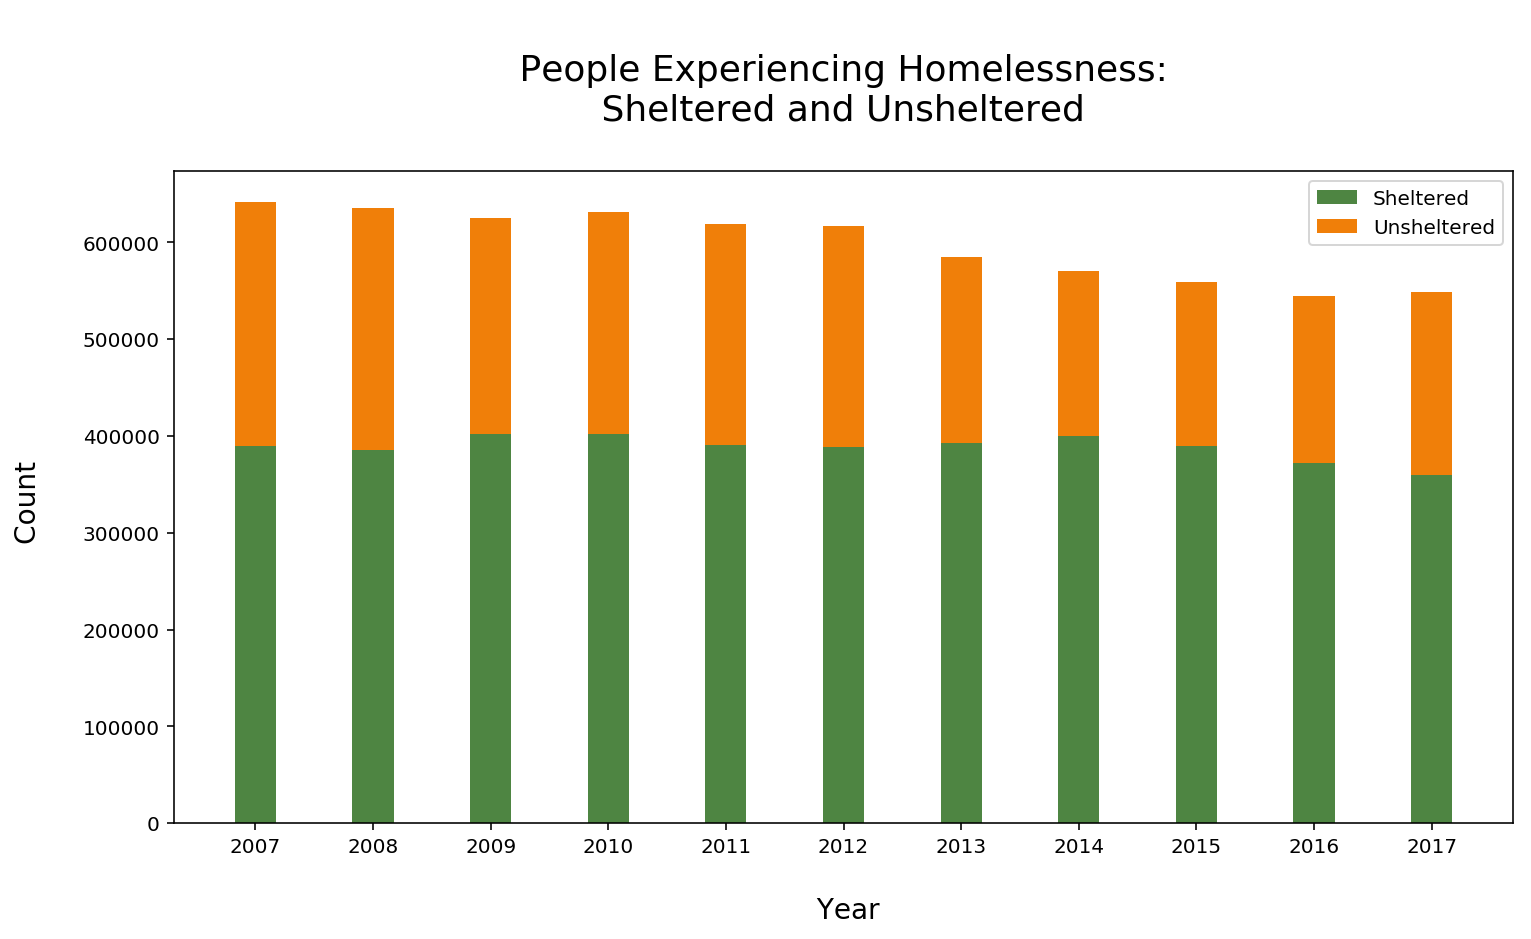

In [71]:
sheltered = shelter_summ.sheltered
unsheltered = shelter_summ.unsheltered
ind = np.arange(len(shelter_summ.total))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind, sheltered, width, color='#4e8542', label='Sheltered')
p2 = plt.bar(ind, unsheltered, width, bottom=sheltered, color='#f07f09', label='Unsheltered')

plt.title('\n People Experiencing Homelessness: \n Sheltered and Unsheltered \n', fontsize=18)
plt.xlabel('\n Year', fontsize=14)
plt.ylabel('Count \n', fontsize=14)
plt.xticks(ind, range(2007, 2018))
plt.legend();

Overall US homlessness show a decline, particularly from 2013 onwards. 

In 2007, approximately $\frac{2}{3}$ of people experiencing homelessness were residing in shelters, with $\frac{1}{3}$ on the streets. This proportion has dropped over time, to approximately $\frac{1}{4}$ of people experiencing homelessness not living in a shelter. 

The primary reduction in homelessness (and in the above proportion) appears to be a drop in the number of people who are experiencing homelessness and are not residing in a shelter. The slight increase in numbers from 2016 to 2017 is a result in an increase in the number of people experiencing homelessness who are not in a shelter such that it outweighed the slight drop in the number of people who were residding in a shelter.

#### Family Status

In [72]:
df_family = pd.read_csv('datasets/homeless-family.csv')
df_family.shape

(153, 19)

In [73]:
df_family.columns

Index(['state', 'state_name', 'year', 'total', 'individual', 'family',
       'yparent', 'ypchild', 'non_ypfam', 'sh_ind', 'uns_ind', 'sh_fam',
       'uns_fam', 'sh_yparent', 'uns_yparent', 'sh_ypchild', 'uns_ypchild',
       'sh_non_ypfam', 'uns_non_ypfam'],
      dtype='object')

In [74]:
fam_summ = df_family.groupby('year').sum()
fam_summ

total  individual    family  yparent  ypchild  non_ypfam    sh_ind  \
year                                                                          
2015  558573.0    353879.0  204694.0   9854.0  13175.0   181665.0  204508.0   
2016  544084.0    350878.0  193206.0   9851.0  13264.0   170091.0  197035.0   
2017  548312.0    365148.0  183164.0   9404.0  12108.0   161652.0  192254.0   

       uns_ind    sh_fam  uns_fam  sh_yparent  uns_yparent  sh_ypchild  \
year                                                                     
2015  149371.0  185339.0  19355.0      9431.0        423.0     12620.0   
2016  153843.0  175014.0  18192.0      9344.0        507.0     12620.0   
2017  172894.0  167415.0  15749.0      8841.0        563.0     11407.0   

      uns_ypchild  sh_non_ypfam  uns_non_ypfam  
year                                            
2015        555.0      163288.0        18377.0  
2016        644.0      153050.0        17041.0  
2017        701.0      147167.0        14485.0

Double check the data configuration.

In [75]:
(fam_summ.sh_ind + fam_summ.uns_ind + fam_summ.sh_fam + fam_summ.uns_fam == fam_summ.total).sum()

3

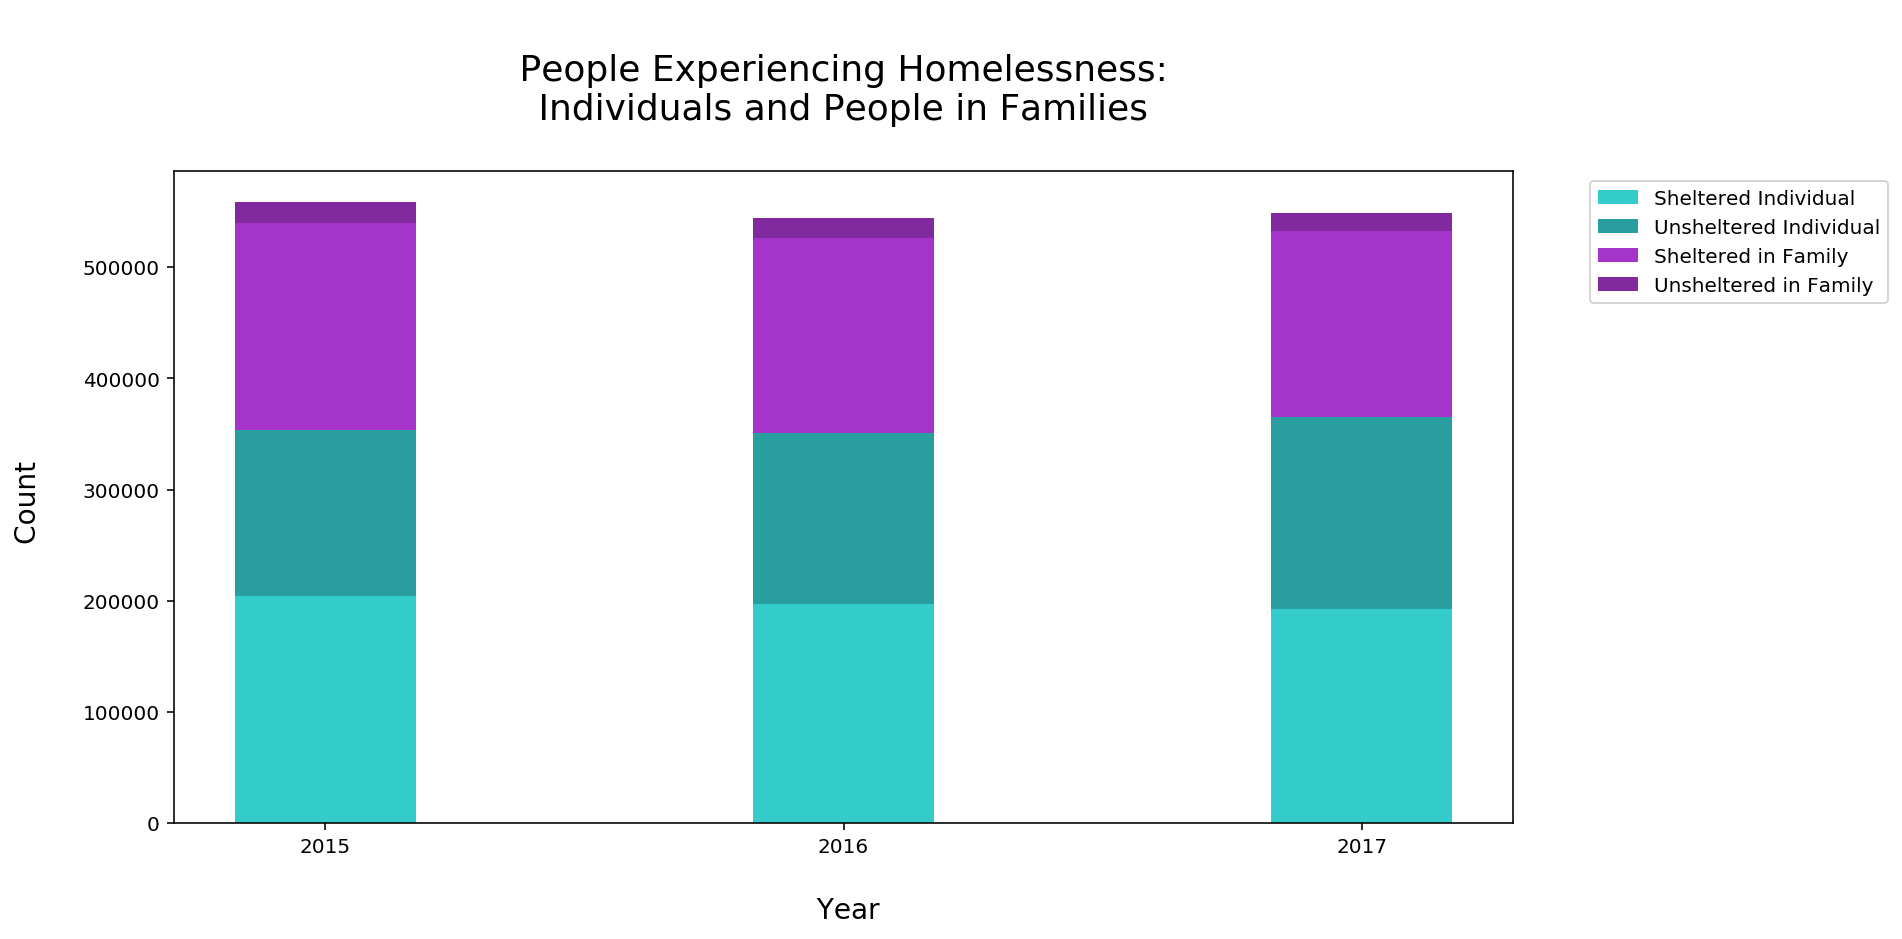

In [76]:
sh_ind = fam_summ.sh_ind
uns_ind = fam_summ.uns_ind
sh_fam = fam_summ.sh_fam
uns_fam = fam_summ.uns_fam
ind = np.arange(len(fam_summ.total))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind, sh_ind, width, color='#34cbcb', label='Sheltered Individual')
p2 = plt.bar(ind, uns_ind, width, bottom=sh_ind, color='#299e9e', label='Unsheltered Individual')
p3 = plt.bar(ind, sh_fam, width, bottom=sh_ind + uns_ind, color='#a534cb', label='Sheltered in Family')
p4 = plt.bar(ind, uns_fam, width, bottom=sh_ind + uns_ind + sh_fam, color='#81299e', label='Unsheltered in Family')

plt.title('\n People Experiencing Homelessness: \n Individuals and People in Families \n', fontsize=18)
plt.xlabel('\n Year', fontsize=14)
plt.ylabel('Count \n', fontsize=14)
plt.xticks(ind, range(2015, 2018))
plt.legend(bbox_to_anchor=(1.05, 1));

The numbers across the categories are very consistent for the three years of data. Approximately $\frac{2}{3}$ of people experiencing homelessness are individuals who are not in a family unit. Of these, approximately half are residing in shelters and half are not. 

The remaining third of people are connected in a family unit. A very small proportion of people in families experience homelessness while not in a shelter. 

This difference in proportion may come from a number of different sources. If children are involved, there is often motivation both from the side of the family, and from service providers to ensure that the children are housed. Conversely, a lack of accommodation while caring for children can result in the children being removed from the family by Child Services. (**NB**: Need to confirm department name) This reality may also decrease the count of people in families who are not sheltered as some may avoid being counted to reduce the risk of losing their children.

It is also noted that families regularly fall into the category of hidden homeless and so it is expected that there are disproportionately more uncounted homeless families. (**NB:** provide reference)

#### Homelessness Type

In [77]:
df_type = pd.read_csv('datasets/homeless-type.csv')
df_type.shape

(561, 12)

In [78]:
df_type.columns

Index(['state', 'state_name', 'year', 'total', 'chronic', 'sh_chronic',
       'uns_chronic', 'non_chronic', 'sh_chronic_ind', 'uns_chronic_ind',
       'sh_chronic_fam', 'uns_chronic_fam'],
      dtype='object')

In [79]:
type_summ = df_type.groupby('year').sum()
type_summ

total   chronic  sh_chronic  uns_chronic  non_chronic  \
year                                                             
2007  641665.0  116422.0     41183.0      75239.0     525243.0   
2008  635445.0  116635.0     44327.0      72308.0     518810.0   
2009  624598.0  104561.0     44908.0      59653.0     520037.0   
2010  630806.0  103431.0     42624.0      60807.0     527375.0   
2011  618611.0  114904.0     45601.0      69303.0     503707.0   
2012  616556.0  108367.0     39307.0      69060.0     508189.0   
2013  584483.0  100321.0     37306.0      63015.0     484162.0   
2014  570514.0   96914.0     40370.0      56544.0     473600.0   
2015  558573.0   94344.0     36568.0      57776.0     464229.0   
2016  544084.0   84279.0     29889.0      54390.0     459805.0   
2017  548312.0   93943.0     32440.0      61503.0     454369.0   

      sh_chronic_ind  uns_chronic_ind  sh_chronic_fam  uns_chronic_fam  
year                                                                    
2007         39617.0          21262.0             0.0              0.0  
2008         38413.0          23631.0             0.0              0.0  
2009         43383.0          29829.0             0.0              0.0  
2010         43389.0          30523.0             0.0              0.0  
2011         38718.0          62937.0          6883.0           6366.0  
2012         32446.0          62010.0          6861.0           7050.0  
2013         29161.0          55361.0          8145.0           7654.0  
2014         31008.0          51302.0          9362.0           5242.0  
2015         28156.0          53350.0          8412.0           4426.0  
2016         24385.0          51437.0          5504.0           2953.0  
2017         26460.0          59083.0          5980.0           2420.0

Double check the data configurations

In [80]:
(type_summ.sh_chronic + type_summ.uns_chronic + type_summ.non_chronic == type_summ.total).sum()

11

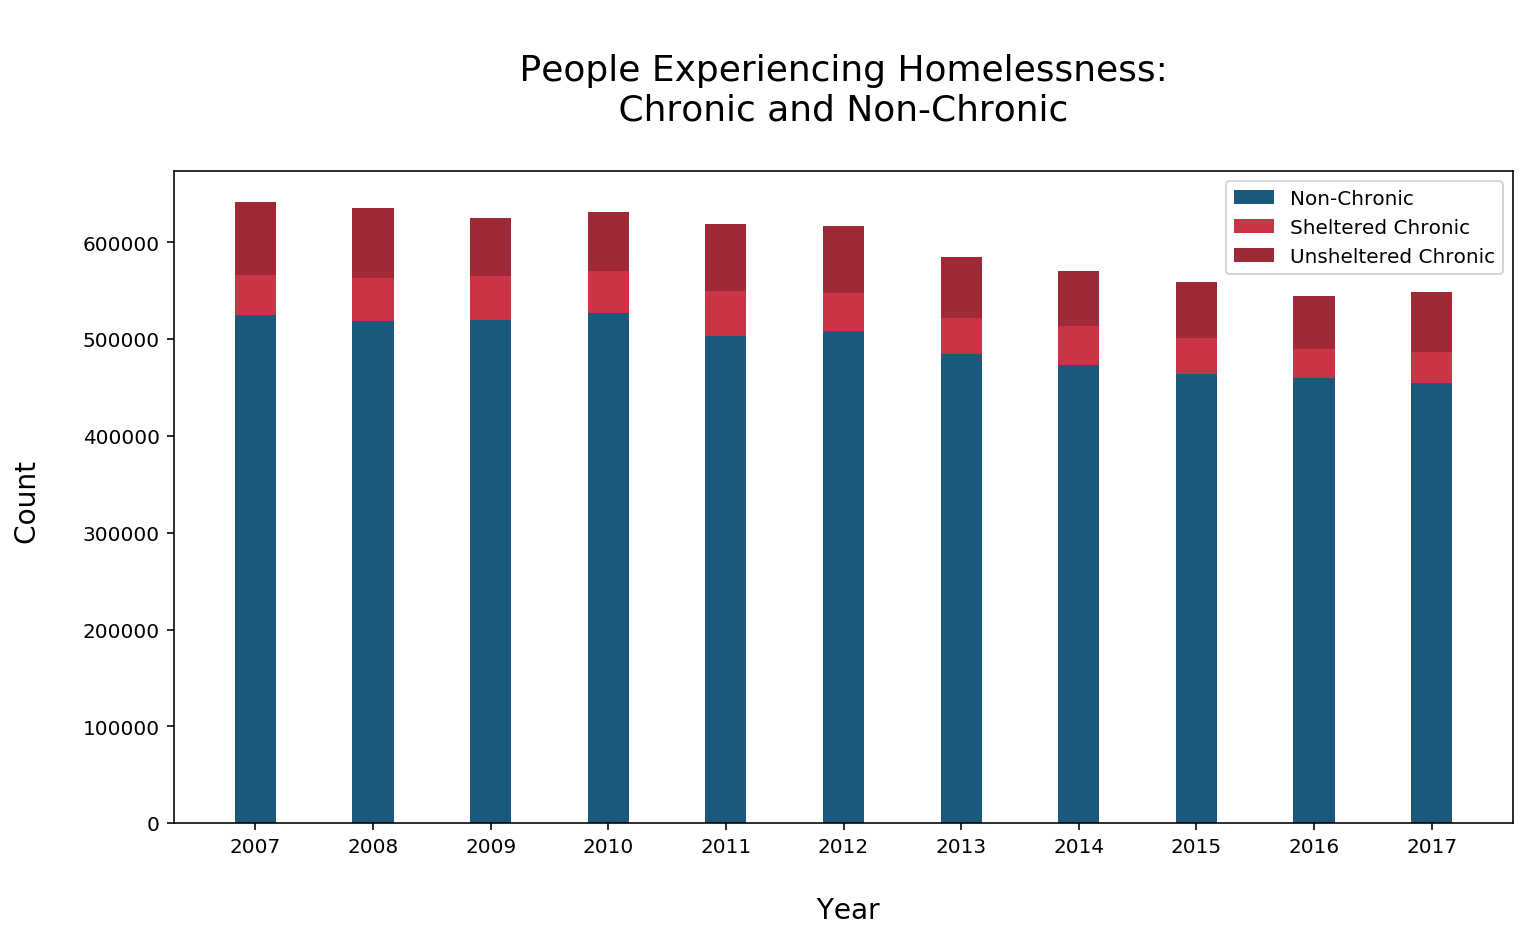

In [81]:
sh_chronic = type_summ.sh_chronic
uns_chronic = type_summ.uns_chronic
non_chronic = type_summ.non_chronic
ind = np.arange(len(type_summ.total))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind, non_chronic, width, color='#1b587c', label='Non-Chronic')
p2 = plt.bar(ind, sh_chronic, width, bottom=non_chronic, color='#cb3446', label='Sheltered Chronic')
p3 = plt.bar(ind, uns_chronic, width, bottom=non_chronic + sh_chronic, color='#9f2936', label='Unsheltered Chronic')

plt.title('\n People Experiencing Homelessness: \n Chronic and Non-Chronic \n', fontsize=18)
plt.xlabel('\n Year', fontsize=14)
plt.ylabel('Count \n', fontsize=14)
plt.xticks(ind, range(2007, 2018))
plt.legend();

This chart provides another interesting insight into the potential causes of the reductions in homelessness. While there has been some reduction in the number of people who experience chronic homelessness when comparing 2007 to 2017, these numbers have remained reasonably consistent from 2013 to 2017. 

Therefore, a substantial amount of the drop in homelessness numbers has come from a reduction in the number of people who are not experiencing chronic homelessness. 

It is also noted that typically, approximately $\frac{1}{3}$ of people who are experiencing chronic homelessness are sheltered, while $\frac{2}{3}$. This is the opposite of what is found when comparing to the general population. 

#### Veteran Status

In [82]:
df_vet = pd.read_csv('datasets/homeless-veteran.csv')
df_vet.shape

(357, 8)

In [83]:
vet_summ = df_vet.groupby('year').sum()
vet_summ

total  veteran  non_veteran  sh_veteran  uns_veteran
year                                                         
2011  618611.0  65253.0     553358.0     39976.0      25277.0
2012  616556.0  60399.0     556157.0     35107.0      25292.0
2013  584483.0  55472.0     529011.0     34865.0      20607.0
2014  570514.0  49534.0     520980.0     32067.0      17467.0
2015  558573.0  47504.0     511069.0     31445.0      16059.0
2016  544084.0  39272.0     504812.0     26359.0      12913.0
2017  548312.0  39915.0     508397.0     24650.0      15265.0

Double check data configuration

In [84]:
(vet_summ.non_veteran + vet_summ.sh_veteran + vet_summ.uns_veteran == vet_summ.total).sum()

7

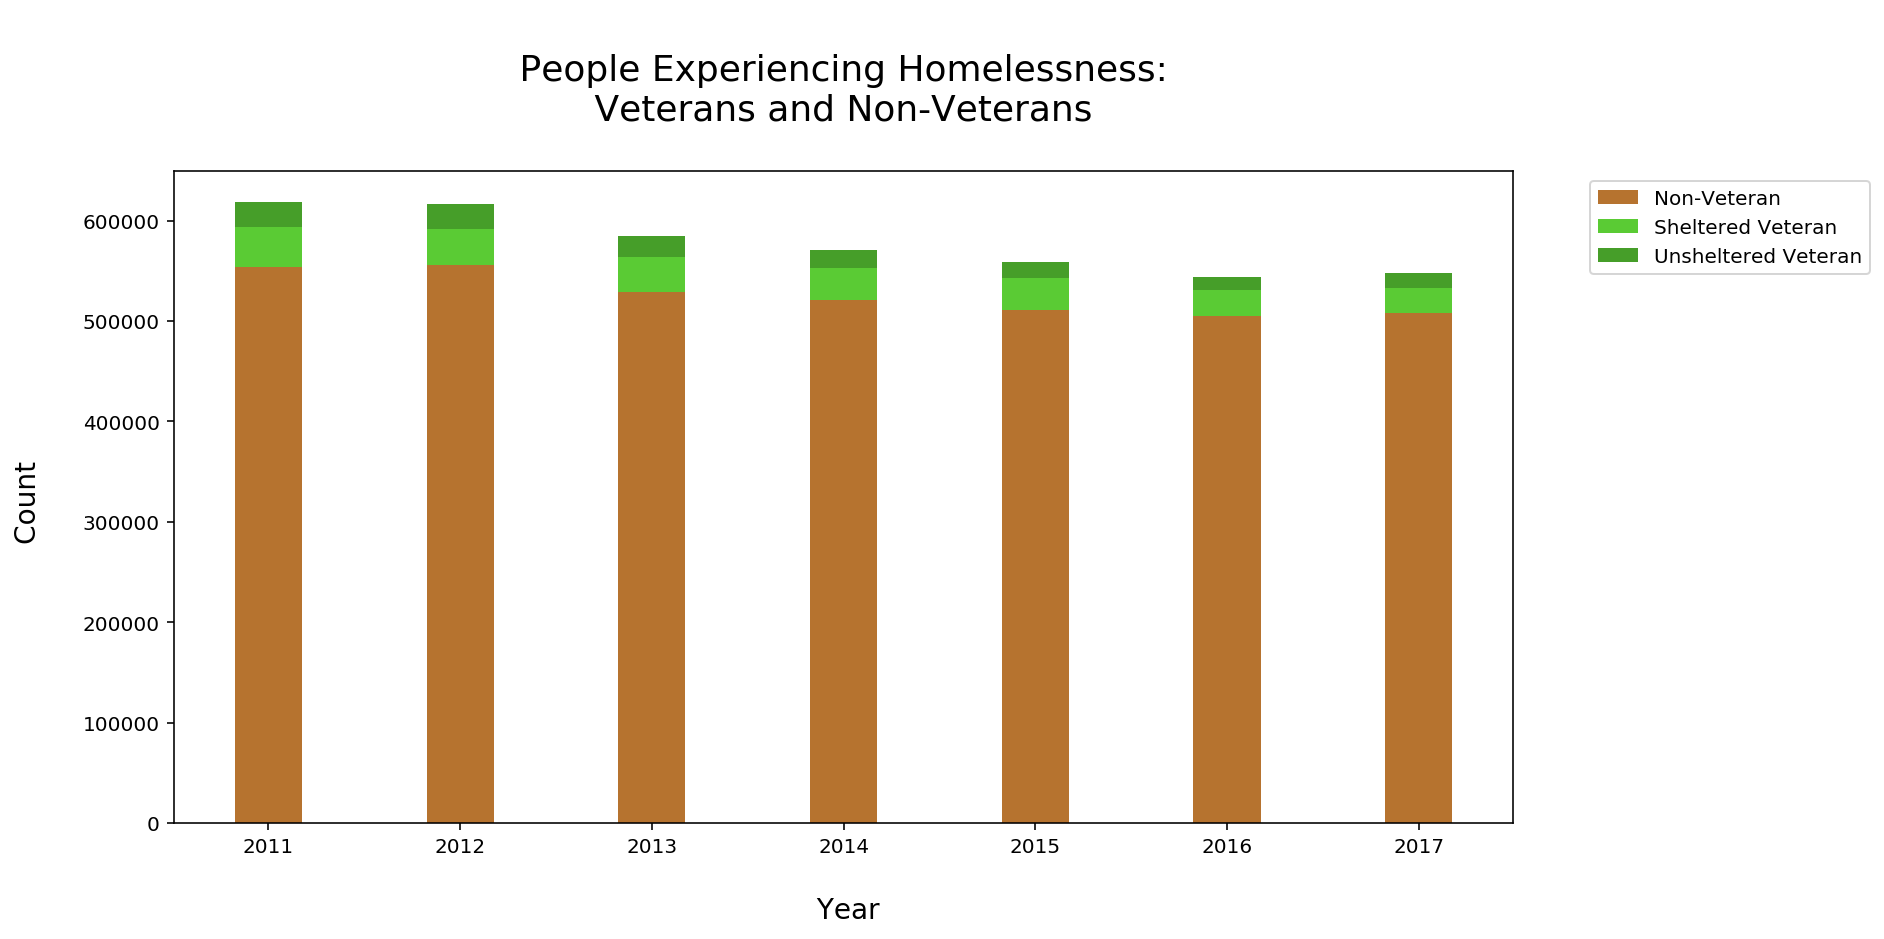

In [85]:
non_vet = vet_summ.non_veteran
sh_vet = vet_summ.sh_veteran
uns_vet = vet_summ.uns_veteran
ind = np.arange(len(vet_summ.total))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind, non_vet, width, color='#b6732f', label='Non-Veteran')
p2 = plt.bar(ind, sh_vet, width, bottom=non_vet, color='#5acb34', label='Sheltered Veteran')
p3 = plt.bar(ind, uns_vet, width, bottom=non_vet + sh_vet, color='#469e29', label='Unsheltered Veteran')

plt.title('\n People Experiencing Homelessness: \n Veterans and Non-Veterans \n', fontsize=18)
plt.xlabel('\n Year', fontsize=14)
plt.ylabel('Count \n', fontsize=14)
plt.xticks(ind, range(2011, 2018))
plt.legend(bbox_to_anchor=(1.05, 1));

The number of veterans experiencing homelessness has decreased from 2011 to 2017 (Though an increase is seen from 2016 to 2071, along with the general numbers). This suggests that the strong focus on this area of homelessness is having an impact.

Approximately $\frac{2}{3}$ of veterans experiencing homelessness reside in shelters, similar to the general population. 

#### Age

In [86]:
df_age = pd.read_csv('datasets/homeless-age.csv')
df_age.shape

(153, 31)

In [87]:
df_age.columns

Index(['state', 'state_name', 'year', 'total', 'youth', 'child', 'yadult',
       'yparent', 'yparent_u18', 'yparent_18to24', 'ypchild', 'adult',
       'non_ypfam', 'sh_youth', 'uns_youth', 'sh_child', 'uns_child',
       'sh_yadult', 'uns_yadult', 'sh_yparent', 'uns_yparent',
       'sh_yparent_u18', 'uns_yparent_u18', 'sh_yparent_18to24',
       'uns_yparent_18to24', 'sh_ypchild', 'uns_ypchild', 'sh_adult',
       'uns_adult', 'sh_non_ypfam', 'uns_non_ypfam'],
      dtype='object')

In [88]:
age_summ = df_age.groupby('year').sum()
age_summ

total    youth   child   yadult  yparent  yparent_u18  \
year                                                             
2015  558573.0  36715.0  4653.0  32062.0   9854.0        126.0   
2016  544084.0  35508.0  3817.0  31691.0   9851.0         92.0   
2017  548312.0  40658.0  4786.0  35872.0   9404.0         96.0   

      yparent_18to24  ypchild     adult  non_ypfam      ...        \
year                                                    ...         
2015          9728.0  13175.0  317164.0   181665.0      ...         
2016          9759.0  13264.0  315370.0   170091.0      ...         
2017          9308.0  12108.0  324490.0   161652.0      ...         

      sh_yparent_u18  uns_yparent_u18  sh_yparent_18to24  uns_yparent_18to24  \
year                                                                           
2015           118.0              8.0             9313.0               415.0   
2016            90.0              2.0             9254.0               505.0   
2017            83.0             13.0             8758.0               550.0   

      sh_ypchild  uns_ypchild  sh_adult  uns_adult  sh_non_ypfam  \
year                                                               
2015     12620.0        555.0  184737.0   132427.0      163288.0   
2016     12620.0        644.0  177903.0   137467.0      153050.0   
2017     11407.0        701.0  173761.0   150729.0      147167.0   

      uns_non_ypfam  
year                 
2015        18377.0  
2016        17041.0  
2017        14485.0  

[3 rows x 28 columns]

Double check the data configuration

In [92]:
(age_summ.child + age_summ.yadult + age_summ.adult + age_summ.yparent_u18 + age_summ.yparent_18to24 + age_summ.ypchild + age_summ.sh_non_ypfam + age_summ.uns_non_ypfam == age_summ.total).sum()

3

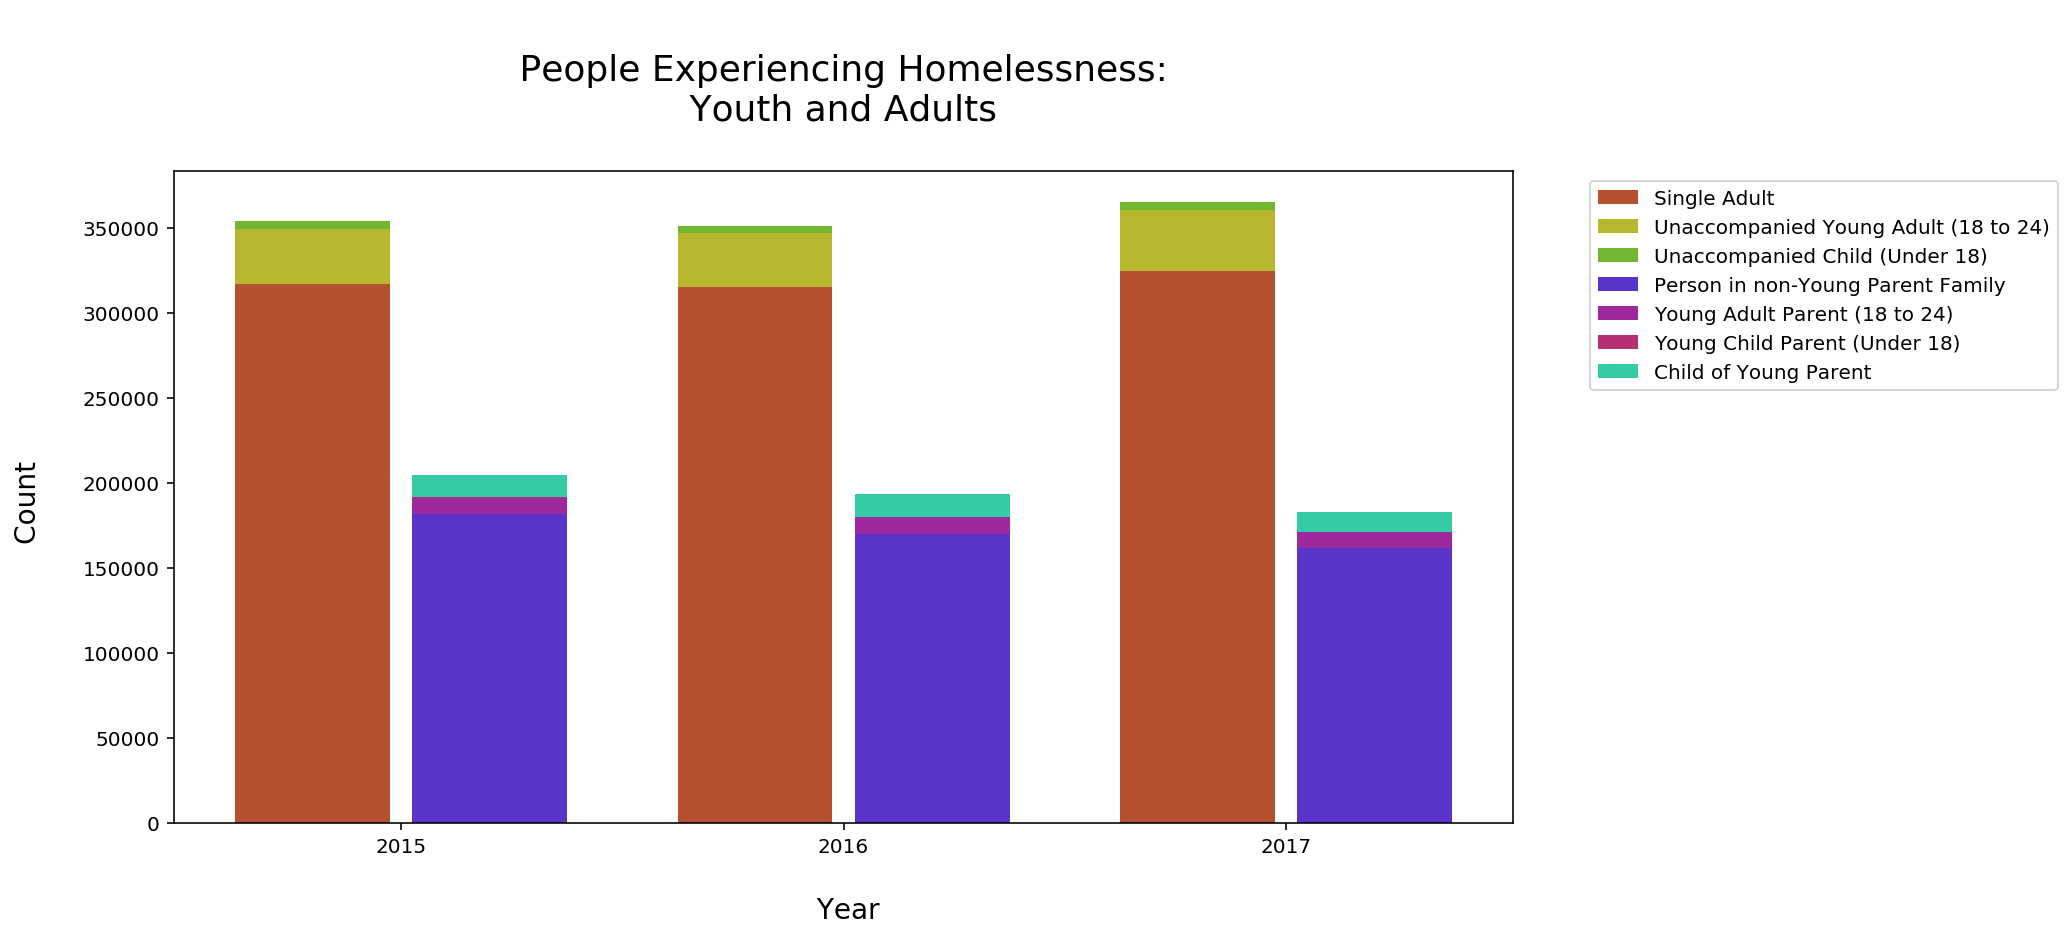

In [89]:
adult = age_summ.adult
yadult = age_summ.yadult
child = age_summ.child
non_ypfam = age_summ.non_ypfam
yparent_18to24 = age_summ.yparent_18to24
yparent_u18 = age_summ.yparent_u18
ypchild = age_summ.ypchild
ind_sing = np.arange(3)
ind_fam = ind_sing + 0.4
width = 0.35

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind_sing, adult, width, color='#b6512f', label='Single Adult')
p2 = plt.bar(ind_sing, yadult, width, bottom=adult, color='#b6b62f', label='Unaccompanied Young Adult (18 to 24)')
p3 = plt.bar(ind_sing, child, width, bottom=adult + yadult, color='#73b62f', label='Unaccompanied Child (Under 18)')

p4 = plt.bar(ind_fam, non_ypfam, width, color='#5a34cb', label='Person in non-Young Parent Family')
p5 = plt.bar(ind_fam, yparent_18to24, width, bottom=non_ypfam, color='#9e299e', label='Young Adult Parent (18 to 24)')
p6 = plt.bar(ind_fam, yparent_u18, width, bottom=non_ypfam + yparent_18to24, color='#b62f73', label='Young Child Parent (Under 18)')
p6 = plt.bar(ind_fam, ypchild, width, bottom=non_ypfam + yparent_18to24 + yparent_u18, color='#34cba5', label='Child of Young Parent')

plt.title('\n People Experiencing Homelessness: \n Youth and Adults \n', fontsize=18)
plt.xlabel('\n Year', fontsize=14)
plt.ylabel('Count \n', fontsize=14)
plt.xticks((ind_sing + ind_fam)/2, range(2015, 2018))
plt.legend(bbox_to_anchor=(1.05, 1));

In [93]:
age_summ.yparent_u18

year
2015    126.0
2016     92.0
2017     96.0
Name: yparent_u18, dtype: float64

The number of individuals experiencing homelessness has increased over the three years, while the number of people in families experiencing homelessness has decreased. 

All categories for individuals (adults, young adults, and children) saw an increase in numbers in 2017. The numbers of people in non-young parent families has also decreased in this time, but the numbers of young parents and children have stayed relatively consistent. 

The numbers of young parents under 18 is so small that it is not easily identifiable on the chart with the current color scheme. This may be a result of the reduced likelihood for those under 18 to have children but may also be due to their reduced age increasing the likelihood that they lose these children. Again, it may also be the case that families of young parent attempt to avoid the count in an attempt not to lose their children. 

### Population Data

In [2]:
pop_df = pd.read_csv('resources/data/us-population-by-state-by-year.csv')
pop_df.head()

State        2010        2011        2012        2013        2014  \
0     .Alabama   4,785,579   4,798,649   4,813,946   4,827,660   4,840,037   
1      .Alaska     714,015     722,259     730,825     736,760     736,759   
2     .Arizona   6,407,002   6,465,488   6,544,211   6,616,124   6,706,435   
3    .Arkansas   2,921,737   2,938,640   2,949,208   2,956,780   2,964,800   
4  .California  37,327,690  37,672,654  38,019,006  38,347,383  38,701,278   

         2015        2016        2017  
0   4,850,858   4,860,545   4,874,747  
1     737,979     741,522     739,795  
2   6,802,262   6,908,642   7,016,270  
3   2,975,626   2,988,231   3,004,279  
4  39,032,444  39,296,476  39,536,653

**Data Issues**
- Period in front of state names
- Population data is str with ","
- Data is not tidy: need one column for year

Remove . with `strip`

In [3]:
pop_copy = pop_df.copy()
pop_copy.State = pop_copy.State.str.strip(".")
pop_copy.head()

State        2010        2011        2012        2013        2014  \
0     Alabama   4,785,579   4,798,649   4,813,946   4,827,660   4,840,037   
1      Alaska     714,015     722,259     730,825     736,760     736,759   
2     Arizona   6,407,002   6,465,488   6,544,211   6,616,124   6,706,435   
3    Arkansas   2,921,737   2,938,640   2,949,208   2,956,780   2,964,800   
4  California  37,327,690  37,672,654  38,019,006  38,347,383  38,701,278   

         2015        2016        2017  
0   4,850,858   4,860,545   4,874,747  
1     737,979     741,522     739,795  
2   6,802,262   6,908,642   7,016,270  
3   2,975,626   2,988,231   3,004,279  
4  39,032,444  39,296,476  39,536,653

Remove `,` with `replace`

In [8]:
pop_copy[pop_copy.columns] = pop_copy[pop_copy.columns].replace({",":""}, regex=True)
pop_copy.head()

State      2010      2011      2012      2013      2014      2015  \
0     Alabama   4785579   4798649   4813946   4827660   4840037   4850858   
1      Alaska    714015    722259    730825    736760    736759    737979   
2     Arizona   6407002   6465488   6544211   6616124   6706435   6802262   
3    Arkansas   2921737   2938640   2949208   2956780   2964800   2975626   
4  California  37327690  37672654  38019006  38347383  38701278  39032444   

       2016      2017  
0   4860545   4874747  
1    741522    739795  
2   6908642   7016270  
3   2988231   3004279  
4  39296476  39536653

Convert to int

In [17]:
cols = list(pop_copy.columns)[1:]
for column in cols:
    pop_copy[column] = pop_copy[column].astype(int)

In [16]:
pop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
State    51 non-null object
2010     51 non-null int32
2011     51 non-null int32
2012     51 non-null int32
2013     51 non-null int32
2014     51 non-null int32
2015     51 non-null int32
2016     51 non-null int32
2017     51 non-null int32
dtypes: int32(8), object(1)
memory usage: 2.1+ KB


In [18]:
pop_copy = pd.melt(pop_copy, id_vars=['State'], value_vars=cols)

In [19]:
pop_copy.head()

State variable     value
0     Alabama     2010   4785579
1      Alaska     2010    714015
2     Arizona     2010   6407002
3    Arkansas     2010   2921737
4  California     2010  37327690

In [20]:
pop_copy.columns = ['state', 'year', 'population']

In [21]:
pop_copy.head()

state  year  population
0     Alabama  2010     4785579
1      Alaska  2010      714015
2     Arizona  2010     6407002
3    Arkansas  2010     2921737
4  California  2010    37327690

In [22]:
pop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 3 columns):
state         408 non-null object
year          408 non-null object
population    408 non-null int32
dtypes: int32(1), object(2)
memory usage: 8.0+ KB


In [35]:
pop_copy.year = pop_copy.year.astype(int)

In [36]:
pop_copy.to_csv('datasets/population.csv', index=False)

In [25]:
homeless = pd.read_csv('datasets/homeless-final.csv')

In [27]:
homeless.head()

state  year  cocs     total  sheltered  unsheltered  individual   sh_ind  \
0    AK  2017     2    1845.0     1551.0        294.0      1354.0   1060.0   
1    AL  2017     8    3793.0     2656.0       1137.0      2985.0   1950.0   
2    AR  2017     6    2467.0     1273.0       1194.0      2068.0    937.0   
3    AZ  2017     3    8947.0     5781.0       3166.0      6488.0   3423.0   
4    CA  2017    43  134278.0    42636.0      91642.0    112756.0  25022.0   

   uns_ind   family     ...       yparent_u18  sh_yparent_u18  \
0    294.0    491.0     ...               0.0             0.0   
1   1035.0    808.0     ...               6.0             6.0   
2   1131.0    399.0     ...               0.0             0.0   
3   3065.0   2459.0     ...               0.0             0.0   
4  87734.0  21522.0     ...              16.0            11.0   

   uns_yparent_u18  yparent_18to24  sh_yparent_18to24  uns_yparent_18to24  \
0              0.0            22.0               22.0                 0.0   
1              0.0            23.0               20.0                 3.0   
2              0.0            10.0               10.0                 0.0   
3              0.0            81.0               81.0                 0.0   
4              5.0           874.0              645.0               229.0   

   ypchild  sh_ypchild  uns_ypchild   state_name  
0     39.0        39.0          0.0      Alaska   
1     39.0        35.0          4.0      Alabama  
2     13.0        13.0          0.0    Arkansas   
3    112.0       112.0          0.0     Arizona   
4   1058.0       782.0        276.0  California   

[5 rows x 46 columns]

In [26]:
home_copy = homeless.copy()

In [28]:
home_copy.columns

Index(['state', 'year', 'cocs', 'total', 'sheltered', 'unsheltered',
       'individual', 'sh_ind', 'uns_ind', 'family', 'sh_fam', 'uns_fam',
       'chronic', 'sh_chronic', 'uns_chronic', 'chronic_ind', 'sh_chronic_ind',
       'uns_chronic_ind', 'chronic_fam', 'sh_chronic_fam', 'uns_chronic_fam',
       'veteran', 'sh_veteran', 'uns_veteran', 'youth', 'sh_youth',
       'uns_youth', 'child', 'sh_child', 'uns_child', 'yadult', 'sh_yadult',
       'uns_yadult', 'yparent', 'sh_yparent', 'uns_yparent', 'yparent_u18',
       'sh_yparent_u18', 'uns_yparent_u18', 'yparent_18to24',
       'sh_yparent_18to24', 'uns_yparent_18to24', 'ypchild', 'sh_ypchild',
       'uns_ypchild', 'state_name'],
      dtype='object')

In [29]:
home_copy.drop(['state', 'cocs'], axis=1, inplace=True)

In [30]:
home_copy.drop(['sheltered', 'unsheltered', 'sh_ind', 'uns_ind', 'sh_fam', 'uns_fam', 'chronic', 'sh_chronic', 'uns_chronic', 'chronic_ind', 'sh_chronic_ind', 'uns_chronic_ind', 'chronic_fam', 'sh_chronic_fam', 'uns_chronic_fam', 'veteran', 'sh_veteran', 'uns_veteran', 'sh_youth', 'uns_youth', 'sh_child', 'uns_child', 'sh_yparent', 'uns_yparent', 'sh_yparent_u18', 'uns_yparent_u18', 'sh_yparent_18to24', 'uns_yparent_18to24', 'sh_ypchild', 'uns_ypchild'], axis=1, inplace=True)

In [31]:
home_copy.head()

year     total  individual   family    youth   child   yadult  sh_yadult  \
0  2017    1845.0      1354.0    491.0    162.0    15.0    147.0      127.0   
1  2017    3793.0      2985.0    808.0    294.0    36.0    258.0      148.0   
2  2017    2467.0      2068.0    399.0    208.0    17.0    191.0       72.0   
3  2017    8947.0      6488.0   2459.0    578.0    55.0    523.0      300.0   
4  2017  134278.0    112756.0  21522.0  15458.0  1649.0  13809.0     2511.0   

   uns_yadult  yparent  yparent_u18  yparent_18to24  ypchild   state_name  
0        20.0     22.0          0.0            22.0     39.0      Alaska   
1       110.0     29.0          6.0            23.0     39.0      Alabama  
2       119.0     10.0          0.0            10.0     13.0    Arkansas   
3       223.0     81.0          0.0            81.0    112.0     Arizona   
4     11298.0    890.0         16.0           874.0   1058.0  California

In [32]:
home_copy.drop(['sh_yadult', 'uns_yadult'], axis=1, inplace=True)

In [37]:
df = pd.merge(left=home_copy, right=pop_copy, left_on=['state_name', 'year'], right_on=['state', 'year'], how='left')
df.head()

year     total  individual   family    youth   child   yadult  yparent  \
0  2017    1845.0      1354.0    491.0    162.0    15.0    147.0     22.0   
1  2017    3793.0      2985.0    808.0    294.0    36.0    258.0     29.0   
2  2017    2467.0      2068.0    399.0    208.0    17.0    191.0     10.0   
3  2017    8947.0      6488.0   2459.0    578.0    55.0    523.0     81.0   
4  2017  134278.0    112756.0  21522.0  15458.0  1649.0  13809.0    890.0   

   yparent_u18  yparent_18to24  ypchild   state_name    state  population  
0          0.0            22.0     39.0      Alaska       NaN         NaN  
1          6.0            23.0     39.0      Alabama  Alabama   4874747.0  
2          0.0            10.0     13.0    Arkansas       NaN         NaN  
3          0.0            81.0    112.0     Arizona       NaN         NaN  
4         16.0           874.0   1058.0  California       NaN         NaN

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 14 columns):
year              561 non-null int64
total             561 non-null float64
individual        561 non-null float64
family            561 non-null float64
youth             153 non-null float64
child             153 non-null float64
yadult            153 non-null float64
yparent           153 non-null float64
yparent_u18       153 non-null float64
yparent_18to24    153 non-null float64
ypchild           153 non-null float64
state_name        561 non-null object
state             8 non-null object
population        8 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 65.7+ KB


In [39]:
df.head(25)

year     total  individual   family    youth   child   yadult  yparent  \
0   2017    1845.0      1354.0    491.0    162.0    15.0    147.0     22.0   
1   2017    3793.0      2985.0    808.0    294.0    36.0    258.0     29.0   
2   2017    2467.0      2068.0    399.0    208.0    17.0    191.0     10.0   
3   2017    8947.0      6488.0   2459.0    578.0    55.0    523.0     81.0   
4   2017  134278.0    112756.0  21522.0  15458.0  1649.0  13809.0    890.0   
5   2017   10940.0      7571.0   3369.0    763.0    45.0    718.0    110.0   
6   2017    3388.0      2208.0   1180.0    170.0    13.0    157.0     64.0   
7   2017    7473.0      3583.0   3890.0    228.0     5.0    223.0    397.0   
8   2017     994.0       615.0    379.0     45.0     2.0     43.0     20.0   
9   2017   32190.0     22768.0   9422.0   2019.0   421.0   1598.0    328.0   
10  2017   10174.0      7422.0   2752.0    526.0    28.0    498.0     75.0   
11  2017    7220.0      4535.0   2685.0    319.0    26.0    293.0     71.0   
12  2017    2756.0      1500.0   1256.0    140.0    12.0    128.0     73.0   
13  2017    2037.0      1309.0    728.0    113.0     7.0    106.0     17.0   
14  2017   10798.0      6894.0   3904.0    730.0    49.0    681.0    290.0   
15  2017    5438.0      3623.0   1815.0    294.0    30.0    264.0     70.0   
16  2017    2287.0      1423.0    864.0    103.0     6.0     97.0     33.0   
17  2017    4025.0      3032.0    993.0    253.0    18.0    235.0     62.0   
18  2017    3305.0      2559.0    746.0    236.0    46.0    190.0     31.0   
19  2017   17565.0      6267.0  11298.0    469.0    57.0    412.0    572.0   
20  2017    7247.0      5077.0   2170.0    272.0    11.0    261.0    121.0   
21  2017    2280.0      1352.0    928.0    178.0    28.0    150.0     26.0   
22  2017    9051.0      5628.0   3423.0    608.0    80.0    528.0    201.0   
23  2017    7668.0      3899.0   3769.0    889.0   136.0    753.0    315.0   
24  2017    6037.0      3768.0   2269.0    548.0   101.0    447.0    163.0   

    yparent_u18  yparent_18to24  ypchild      state_name    state  population  
0           0.0            22.0     39.0         Alaska       NaN         NaN  
1           6.0            23.0     39.0         Alabama  Alabama   4874747.0  
2           0.0            10.0     13.0       Arkansas       NaN         NaN  
3           0.0            81.0    112.0        Arizona       NaN         NaN  
4          16.0           874.0   1058.0     California       NaN         NaN  
5           0.0           110.0    138.0       Colorado       NaN         NaN  
6           0.0            64.0     89.0    Connecticut       NaN         NaN  
7           0.0           397.0    482.0   Washington DC      NaN         NaN  
8           2.0            18.0     25.0       Delaware       NaN         NaN  
9          16.0           312.0    483.0        Florida       NaN         NaN  
10          0.0            75.0    139.0        Georgia       NaN         NaN  
11          0.0            71.0     68.0         Hawaii       NaN         NaN  
12          0.0            73.0    107.0           Iowa       NaN         NaN  
13          0.0            17.0     24.0          Idaho       NaN         NaN  
14          1.0           289.0    406.0       Illinois       NaN         NaN  
15          0.0            70.0     93.0        Indiana       NaN         NaN  
16          0.0            33.0     60.0         Kansas       NaN         NaN  
17          1.0            61.0     89.0       Kentucky       NaN         NaN  
18          0.0            31.0     55.0      Louisiana       NaN         NaN  
19          0.0           572.0    715.0  Massachusetts       NaN         NaN  
20          0.0           121.0    176.0       Maryland       NaN         NaN  
21          2.0            24.0     33.0          Maine       NaN         NaN  
22          5.0           196.0    319.0       Michigan       NaN         NaN  
23         10.0           305.0    501.0      Minnesota

In [40]:
df.state_name.unique()

array(['Alaska\xa0', 'Alabama', 'Arkansas\xa0', 'Arizona\xa0',
       'California\xa0', 'Colorado\xa0', 'Connecticut\xa0',
       'Washington DC', 'Delaware\xa0', 'Florida\xa0', 'Georgia\xa0',
       'Hawaii\xa0', 'Iowa\xa0', 'Idaho\xa0', 'Illinois\xa0',
       'Indiana\xa0', 'Kansas\xa0', 'Kentucky\xa0', 'Louisiana\xa0',
       'Massachusetts\xa0', 'Maryland\xa0', 'Maine\xa0', 'Michigan\xa0',
       'Minnesota\xa0', 'Missouri\xa0', 'Mississippi\xa0', 'Montana\xa0',
       'North Carolina\xa0', 'North Dakota\xa0', 'Nebraska\xa0',
       'New Hampshire\xa0', 'New Jersey\xa0', 'New Mexico\xa0',
       'Nevada\xa0', 'New York\xa0', 'Ohio\xa0', 'Oklahoma\xa0',
       'Oregon\xa0', 'Pennsylvania\xa0', 'Rhode Island\xa0',
       'South Carolina\xa0', 'South Dakota\xa0', 'Tennessee\xa0',
       'Texas\xa0', 'Utah\xa0', 'Virginia\xa0', 'Vermont\xa0',
       'Washington\xa0', 'Wisconsin\xa0', 'West Virginia\xa0',
       'Wyoming\xa0', 'Kansas*'], dtype=object)

In [41]:
home_copy.state_name = home_copy.state_name.replace({"\xa0":""}, regex=True)

In [42]:
home_copy.state_name.unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Washington DC', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana',
       'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland',
       'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi',
       'Montana', 'North Carolina', 'North Dakota', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming', 'Kansas*'], dtype=object)

In [43]:
home_copy.to_csv('homeless-final.csv', index=False)

In [54]:
df = pd.merge(left=home_copy, right=pop_copy, left_on=['state_name', 'year'], right_on=['state', 'year'], how='left')
df.head()

year     total  individual   family    youth   child   yadult  yparent  \
0  2017    1845.0      1354.0    491.0    162.0    15.0    147.0     22.0   
1  2017    3793.0      2985.0    808.0    294.0    36.0    258.0     29.0   
2  2017    2467.0      2068.0    399.0    208.0    17.0    191.0     10.0   
3  2017    8947.0      6488.0   2459.0    578.0    55.0    523.0     81.0   
4  2017  134278.0    112756.0  21522.0  15458.0  1649.0  13809.0    890.0   

   yparent_u18  yparent_18to24  ypchild  state_name       state  population  
0          0.0            22.0     39.0      Alaska      Alaska    739795.0  
1          6.0            23.0     39.0     Alabama     Alabama   4874747.0  
2          0.0            10.0     13.0    Arkansas    Arkansas   3004279.0  
3          0.0            81.0    112.0     Arizona     Arizona   7016270.0  
4         16.0           874.0   1058.0  California  California  39536653.0

In [55]:
df.drop('state_name', axis=1, inplace=True)

In [46]:
df.population.max()

39536653.0

In [56]:
df['per_capita'] = df.total/df.population*1000

In [48]:
df.head()

year     total  individual   family    youth   child   yadult  yparent  \
0  2017    1845.0      1354.0    491.0    162.0    15.0    147.0     22.0   
1  2017    3793.0      2985.0    808.0    294.0    36.0    258.0     29.0   
2  2017    2467.0      2068.0    399.0    208.0    17.0    191.0     10.0   
3  2017    8947.0      6488.0   2459.0    578.0    55.0    523.0     81.0   
4  2017  134278.0    112756.0  21522.0  15458.0  1649.0  13809.0    890.0   

   yparent_u18  yparent_18to24  ypchild       state  population  per_capita  
0          0.0            22.0     39.0      Alaska    739795.0    2.493934  
1          6.0            23.0     39.0     Alabama   4874747.0    0.778092  
2          0.0            10.0     13.0    Arkansas   3004279.0    0.821162  
3          0.0            81.0    112.0     Arizona   7016270.0    1.275179  
4         16.0           874.0   1058.0  California  39536653.0    3.396292

In [49]:
df.per_capita.describe()

count    399.000000
mean       1.629610
std        0.925184
min        0.493281
25%        1.034470
50%        1.263379
75%        1.827805
max        5.544267
Name: per_capita, dtype: float64

In [57]:
df.drop(df.iloc[:, 2:-3], axis=1, inplace=True)

In [59]:
df.drop('total', axis=1, inplace=True)

In [60]:
df.head()

year       state  population  per_capita
0  2017      Alaska    739795.0    2.493934
1  2017     Alabama   4874747.0    0.778092
2  2017    Arkansas   3004279.0    0.821162
3  2017     Arizona   7016270.0    1.275179
4  2017  California  39536653.0    3.396292

In [61]:
df.to_csv('datasets/per-capita.csv', index=False)

### Adding 2007 - 2009 Population

In [33]:
pop_df = pd.read_csv('datasets/population.csv')
pop_df.head()

state  year  population
0     Alabama  2010     4785579
1      Alaska  2010      714015
2     Arizona  2010     6407002
3    Arkansas  2010     2921737
4  California  2010    37327690

In [3]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 3 columns):
state         408 non-null object
year          408 non-null int64
population    408 non-null int64
dtypes: int64(2), object(1)
memory usage: 9.6+ KB


Had a problem - I'd over written my dataset and it was not the way it should be... time to revert that commit!!

In [5]:
home_df = pd.read_csv('datasets/homeless-final.csv')
home_df.head()

state  year  cocs     total  sheltered  unsheltered  individual   sh_ind  \
0    AK  2017     2    1845.0     1551.0        294.0      1354.0   1060.0   
1    AL  2017     8    3793.0     2656.0       1137.0      2985.0   1950.0   
2    AR  2017     6    2467.0     1273.0       1194.0      2068.0    937.0   
3    AZ  2017     3    8947.0     5781.0       3166.0      6488.0   3423.0   
4    CA  2017    43  134278.0    42636.0      91642.0    112756.0  25022.0   

   uns_ind   family     ...       yparent_u18  sh_yparent_u18  \
0    294.0    491.0     ...               0.0             0.0   
1   1035.0    808.0     ...               6.0             6.0   
2   1131.0    399.0     ...               0.0             0.0   
3   3065.0   2459.0     ...               0.0             0.0   
4  87734.0  21522.0     ...              16.0            11.0   

   uns_yparent_u18  yparent_18to24  sh_yparent_18to24  uns_yparent_18to24  \
0              0.0            22.0               22.0                 0.0   
1              0.0            23.0               20.0                 3.0   
2              0.0            10.0               10.0                 0.0   
3              0.0            81.0               81.0                 0.0   
4              5.0           874.0              645.0               229.0   

   ypchild  sh_ypchild  uns_ypchild   state_name  
0     39.0        39.0          0.0      Alaska   
1     39.0        35.0          4.0      Alabama  
2     13.0        13.0          0.0    Arkansas   
3    112.0       112.0          0.0     Arizona   
4   1058.0       782.0        276.0  California   

[5 rows x 46 columns]

Clean extra figures from state name

In [6]:
home_df.state_name = home_df.state_name.replace({"\xa0":""}, regex=True)

In [57]:
home_df.to_csv('datasets/homeless-final.csv', index=False)

In [8]:
pop_pre_df = pd.read_csv('resources/data/us-population-by-state-by-year-0010.csv')
pop_pre_df.head()

State        2007        2008        2009
0     .Alabama   4,634,063   4,673,889   4,707,496
1      .Alaska     679,893     685,532     694,690
2     .Arizona   6,360,238   6,499,207   6,587,653
3    .Arkansas   2,841,595   2,867,099   2,887,331
4  .California  36,185,908  36,538,008  36,887,615

Clean as before:
- Remove `.` with `strip`
- Remove `,` with `replace`
- Convert to int
- Collapse years and change names

In [10]:
pop_pre_df.State = pop_pre_df.State.str.strip(".")
pop_pre_df[pop_pre_df.columns] = pop_pre_df[pop_pre_df.columns].replace({",":""}, regex=True)
cols = list(pop_pre_df.columns)[1:]
pop_pre_df[cols] = pop_pre_df[cols].astype(int)

In [11]:
pop_pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State    51 non-null object
2007     51 non-null int32
2008     51 non-null int32
2009     51 non-null int32
dtypes: int32(3), object(1)
memory usage: 1.1+ KB


In [34]:
pop_pre_df = pd.melt(pop_pre_df, 
                     id_vars=['State'], 
                     value_vars=['2007', '2008', '2009'], 
                     var_name='year', 
                     value_name='population')

pop_pre_df.head()

State  year  population
0     Alabama  2007     4634063
1      Alaska  2007      679893
2     Arizona  2007     6360238
3    Arkansas  2007     2841595
4  California  2007    36185908

In [35]:
pop_pre_df.columns = ['state', 'year', 'population']

In [13]:
home_df.columns

Index(['state', 'year', 'cocs', 'total', 'sheltered', 'unsheltered',
       'individual', 'sh_ind', 'uns_ind', 'family', 'sh_fam', 'uns_fam',
       'chronic', 'sh_chronic', 'uns_chronic', 'chronic_ind', 'sh_chronic_ind',
       'uns_chronic_ind', 'chronic_fam', 'sh_chronic_fam', 'uns_chronic_fam',
       'veteran', 'sh_veteran', 'uns_veteran', 'youth', 'sh_youth',
       'uns_youth', 'child', 'sh_child', 'uns_child', 'yadult', 'sh_yadult',
       'uns_yadult', 'yparent', 'sh_yparent', 'uns_yparent', 'yparent_u18',
       'sh_yparent_u18', 'uns_yparent_u18', 'yparent_18to24',
       'sh_yparent_18to24', 'uns_yparent_18to24', 'ypchild', 'sh_ypchild',
       'uns_ypchild', 'state_name'],
      dtype='object')

In [18]:
drop_cols = [0, 2, 4, 5, 7, 8, 25, 26, 28, 29, 31, 32]
home_df.drop(home_df.columns[drop_cols], axis=1, inplace=True)

In [20]:
home_df.columns

Index(['year', 'total', 'individual', 'family', 'sh_fam', 'uns_fam', 'chronic',
       'sh_chronic', 'uns_chronic', 'chronic_ind', 'sh_chronic_ind',
       'uns_chronic_ind', 'chronic_fam', 'sh_chronic_fam', 'uns_chronic_fam',
       'veteran', 'sh_veteran', 'uns_veteran', 'youth', 'child', 'yadult',
       'yparent', 'sh_yparent', 'uns_yparent', 'yparent_u18', 'sh_yparent_u18',
       'uns_yparent_u18', 'yparent_18to24', 'sh_yparent_18to24',
       'uns_yparent_18to24', 'ypchild', 'sh_ypchild', 'uns_ypchild',
       'state_name'],
      dtype='object')

In [21]:
home_df.drop(home_df.iloc[:, 4:18], axis=1, inplace=True)

In [22]:
home_df.columns

Index(['year', 'total', 'individual', 'family', 'youth', 'child', 'yadult',
       'yparent', 'sh_yparent', 'uns_yparent', 'yparent_u18', 'sh_yparent_u18',
       'uns_yparent_u18', 'yparent_18to24', 'sh_yparent_18to24',
       'uns_yparent_18to24', 'ypchild', 'sh_ypchild', 'uns_ypchild',
       'state_name'],
      dtype='object')

In [23]:
drop_cols = [8, 9, 11, 12, 14, 15, 17, 18]
home_df.drop(home_df.columns[drop_cols], axis=1, inplace=True)
home_df.head()

year     total  individual   family    youth   child   yadult  yparent  \
0  2017    1845.0      1354.0    491.0    162.0    15.0    147.0     22.0   
1  2017    3793.0      2985.0    808.0    294.0    36.0    258.0     29.0   
2  2017    2467.0      2068.0    399.0    208.0    17.0    191.0     10.0   
3  2017    8947.0      6488.0   2459.0    578.0    55.0    523.0     81.0   
4  2017  134278.0    112756.0  21522.0  15458.0  1649.0  13809.0    890.0   

   yparent_u18  yparent_18to24  ypchild  state_name  
0          0.0            22.0     39.0      Alaska  
1          6.0            23.0     39.0     Alabama  
2          0.0            10.0     13.0    Arkansas  
3          0.0            81.0    112.0     Arizona  
4         16.0           874.0   1058.0  California

In [24]:
home_df.state_name.unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Washington DC', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana',
       'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland',
       'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi',
       'Montana', 'North Carolina', 'North Dakota', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming', 'Kansas*'], dtype=object)

In [25]:
home_df.query('state_name == "Kansas*"')

year   total  individual  family  youth  child  yadult  yparent  \
169  2014  2783.0      1533.0  1250.0    NaN    NaN     NaN      NaN   

     yparent_u18  yparent_18to24  ypchild state_name  
169          NaN             NaN      NaN    Kansas*

In [26]:
home_df.query('state_name == "Kansas"')

year   total  individual  family  youth  child  yadult  yparent  \
16   2017  2287.0      1423.0   864.0  103.0    6.0    97.0     33.0   
67   2016  2255.0      1228.0  1027.0  106.0   19.0    87.0     17.0   
118  2015  2588.0      1466.0  1122.0   89.0    3.0    86.0     28.0   
220  2013  2693.0      1480.0  1213.0    NaN    NaN     NaN      NaN   
271  2012  2684.0      1526.0  1158.0    NaN    NaN     NaN      NaN   
322  2011  2511.0      1425.0  1086.0    NaN    NaN     NaN      NaN   
373  2010  2024.0      1318.0   706.0    NaN    NaN     NaN      NaN   
424  2009  1892.0      1238.0   654.0    NaN    NaN     NaN      NaN   
475  2008  1738.0      1080.0   658.0    NaN    NaN     NaN      NaN   
526  2007  2111.0      1208.0   903.0    NaN    NaN     NaN      NaN   

     yparent_u18  yparent_18to24  ypchild state_name  
16           0.0            33.0     60.0     Kansas  
67           0.0            17.0     23.0     Kansas  
118          0.0            28.0     31.0     Kansas  
220          NaN             NaN      NaN     Kansas  
271          NaN             NaN      NaN     Kansas  
322          NaN             NaN      NaN     Kansas  
373          NaN             NaN      NaN     Kansas  
424          NaN             NaN      NaN     Kansas  
475          NaN             NaN      NaN     Kansas  
526          NaN             NaN      NaN     Kansas

In [29]:
home_copy = home_df.copy()

In [30]:
home_copy.state_name.iloc[169] = "Kansas"

C:\Users\rebecca-barnes\Anaconda3\envs\DAND\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
home_copy.state_name.unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Washington DC', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana',
       'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland',
       'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi',
       'Montana', 'North Carolina', 'North Dakota', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming'], dtype=object)

In [36]:
combined_pop = pd.concat([pop_df, pop_pre_df])
combined_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 152
Data columns (total 3 columns):
state         561 non-null object
year          561 non-null object
population    561 non-null int64
dtypes: int64(1), object(2)
memory usage: 17.5+ KB


In [58]:
tableau_data = pd.merge(left=home_copy, 
                        right=combined_pop, 
                        left_on=['state_name', 'year'], 
                        right_on=['state', 'year'], 
                        how='left')
tableau_data.head()

year     total  individual   family    youth   child   yadult  yparent  \
0  2017    1845.0      1354.0    491.0    162.0    15.0    147.0     22.0   
1  2017    3793.0      2985.0    808.0    294.0    36.0    258.0     29.0   
2  2017    2467.0      2068.0    399.0    208.0    17.0    191.0     10.0   
3  2017    8947.0      6488.0   2459.0    578.0    55.0    523.0     81.0   
4  2017  134278.0    112756.0  21522.0  15458.0  1649.0  13809.0    890.0   

   yparent_u18  yparent_18to24  ypchild  state_name       state  population  
0          0.0            22.0     39.0      Alaska      Alaska    739795.0  
1          6.0            23.0     39.0     Alabama     Alabama   4874747.0  
2          0.0            10.0     13.0    Arkansas    Arkansas   3004279.0  
3          0.0            81.0    112.0     Arizona     Arizona   7016270.0  
4         16.0           874.0   1058.0  California  California  39536653.0

In [59]:
tableau_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 14 columns):
year              561 non-null object
total             561 non-null float64
individual        561 non-null float64
family            561 non-null float64
youth             153 non-null float64
child             153 non-null float64
yadult            153 non-null float64
yparent           153 non-null float64
yparent_u18       153 non-null float64
yparent_18to24    153 non-null float64
ypchild           153 non-null float64
state_name        561 non-null object
state             400 non-null object
population        400 non-null float64
dtypes: float64(11), object(3)
memory usage: 65.7+ KB


In [60]:
tableau_data[tableau_data.state.isnull()]

year     total  individual   family  youth  child  yadult  yparent  \
7    2017    7473.0      3583.0   3890.0  228.0    5.0   223.0    397.0   
58   2016    8350.0      3683.0   4667.0  211.0   10.0   201.0    527.0   
109  2015    7298.0      3821.0   3477.0  200.0    7.0   193.0    366.0   
160  2014    7748.0      3953.0   3795.0    NaN    NaN     NaN      NaN   
211  2013    6865.0      3696.0   3169.0    NaN    NaN     NaN      NaN   
262  2012    6954.0      3767.0   3187.0    NaN    NaN     NaN      NaN   
313  2011    6546.0      3858.0   2688.0    NaN    NaN     NaN      NaN   
364  2010    6539.0      4016.0   2523.0    NaN    NaN     NaN      NaN   
408  2009    1992.0      1239.0    753.0    NaN    NaN     NaN      NaN   
409  2009    6080.0      4686.0   1394.0    NaN    NaN     NaN      NaN   
410  2009    2852.0      2181.0    671.0    NaN    NaN     NaN      NaN   
411  2009   14721.0      9959.0   4762.0    NaN    NaN     NaN      NaN   
412  2009  123678.0     97534.0  26144.0    NaN    NaN     NaN      NaN   
413  2009   15268.0      7401.0   7867.0    NaN    NaN     NaN      NaN   
414  2009    4605.0      2773.0   1832.0    NaN    NaN     NaN      NaN   
415  2009    6228.0      3934.0   2294.0    NaN    NaN     NaN      NaN   
416  2009    1130.0       776.0    354.0    NaN    NaN     NaN      NaN   
417  2009   55599.0     34432.0  21167.0    NaN    NaN     NaN      NaN   
418  2009   20360.0     14365.0   5995.0    NaN    NaN     NaN      NaN   
419  2009    5782.0      2941.0   2841.0    NaN    NaN     NaN      NaN   
420  2009    3380.0      1655.0   1725.0    NaN    NaN     NaN      NaN   
421  2009    1939.0      1117.0    822.0    NaN    NaN     NaN      NaN   
422  2009   14055.0      7475.0   6580.0    NaN    NaN     NaN      NaN   
423  2009    6984.0      4151.0   2833.0    NaN    NaN     NaN      NaN   
424  2009    1892.0      1238.0    654.0    NaN    NaN     NaN      NaN   
425  2009    5999.0      3302.0   2697.0    NaN    NaN     NaN      NaN   
426  2009   12504.0     10098.0   2406.0    NaN    NaN     NaN      NaN   
427  2009   15482.0      7057.0   8425.0    NaN    NaN     NaN      NaN   
428  2009   11698.0      6641.0   5057.0    NaN    NaN     NaN      NaN   
429  2009    2444.0      1124.0   1320.0    NaN    NaN     NaN      NaN   
..    ...       ...         ...      ...    ...    ...     ...      ...   
531  2007    2638.0      1136.0   1502.0    NaN    NaN     NaN      NaN   
532  2007   28295.0     17553.0  10742.0    NaN    NaN     NaN      NaN   
533  2007    7323.0      3269.0   4054.0    NaN    NaN     NaN      NaN   
534  2007    6247.0      3336.0   2911.0    NaN    NaN     NaN      NaN   
535  2007    1377.0      1115.0    262.0    NaN    NaN     NaN      NaN   
536  2007    1150.0       633.0    517.0    NaN    NaN     NaN      NaN   
537  2007   11802.0      8391.0   3411.0    NaN    NaN     NaN      NaN   
538  2007     636.0       403.0    233.0    NaN    NaN     NaN      NaN   
539  2007    3531.0      2172.0   1359.0    NaN    NaN     NaN      NaN   
540  2007    2248.0      1255.0    993.0    NaN    NaN     NaN      NaN   
541  2007   17314.0      8972.0   8342.0    NaN    NaN     NaN      NaN   
542  2007    3015.0      1861.0   1154.0    NaN    NaN     NaN      NaN   
543  2007    8642.0      6477.0   2165.0    NaN    NaN     NaN      NaN   
544  2007   62601.0     28056.0  34545.0    NaN    NaN     NaN      NaN   
545  2007   11264.0      6870.0   4394.0    NaN    NaN     NaN      NaN   
546  2007    4221.0      2982.0   1239.0    NaN    NaN     NaN      NaN   
547  2007   17590.0      9871.0   7719.0    NaN    NaN     NaN      NaN   
548  2007   16220.0      8229.0   7991.0    NaN    NaN     NaN      NaN   
549  2007    1372.0       643.0    729.0    NaN    NaN     NaN      NaN   
550  2007    5660.0      3771.0   1889.0    NaN    NaN     NaN      NaN   
551  2007     579.0       268.0    311.0    NaN    NaN     NaN      NaN   
552  2007   11210.0      8462.

In [61]:
combined_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 152
Data columns (total 3 columns):
state         561 non-null object
year          561 non-null object
population    561 non-null int64
dtypes: int64(1), object(2)
memory usage: 17.5+ KB


In [62]:
home_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
year              561 non-null int64
total             561 non-null float64
individual        561 non-null float64
family            561 non-null float64
youth             153 non-null float64
child             153 non-null float64
yadult            153 non-null float64
yparent           153 non-null float64
yparent_u18       153 non-null float64
yparent_18to24    153 non-null float64
ypchild           153 non-null float64
state_name        561 non-null object
dtypes: float64(10), int64(1), object(1)
memory usage: 52.7+ KB


In [63]:
combined_pop.year = combined_pop.year.astype(int)

In [64]:
tableau_data = pd.merge(left=home_copy, 
                        right=combined_pop, 
                        left_on=['state_name', 'year'], 
                        right_on=['state', 'year'], 
                        how='left')
tableau_data.head()

year     total  individual   family    youth   child   yadult  yparent  \
0  2017    1845.0      1354.0    491.0    162.0    15.0    147.0     22.0   
1  2017    3793.0      2985.0    808.0    294.0    36.0    258.0     29.0   
2  2017    2467.0      2068.0    399.0    208.0    17.0    191.0     10.0   
3  2017    8947.0      6488.0   2459.0    578.0    55.0    523.0     81.0   
4  2017  134278.0    112756.0  21522.0  15458.0  1649.0  13809.0    890.0   

   yparent_u18  yparent_18to24  ypchild  state_name       state  population  
0          0.0            22.0     39.0      Alaska      Alaska    739795.0  
1          6.0            23.0     39.0     Alabama     Alabama   4874747.0  
2          0.0            10.0     13.0    Arkansas    Arkansas   3004279.0  
3          0.0            81.0    112.0     Arizona     Arizona   7016270.0  
4         16.0           874.0   1058.0  California  California  39536653.0

In [65]:
tableau_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 14 columns):
year              561 non-null int64
total             561 non-null float64
individual        561 non-null float64
family            561 non-null float64
youth             153 non-null float64
child             153 non-null float64
yadult            153 non-null float64
yparent           153 non-null float64
yparent_u18       153 non-null float64
yparent_18to24    153 non-null float64
ypchild           153 non-null float64
state_name        561 non-null object
state             550 non-null object
population        550 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 65.7+ KB


In [66]:
tableau_data[tableau_data.state.isnull()]

year   total  individual  family  youth  child  yadult  yparent  \
7    2017  7473.0      3583.0  3890.0  228.0    5.0   223.0    397.0   
58   2016  8350.0      3683.0  4667.0  211.0   10.0   201.0    527.0   
109  2015  7298.0      3821.0  3477.0  200.0    7.0   193.0    366.0   
160  2014  7748.0      3953.0  3795.0    NaN    NaN     NaN      NaN   
211  2013  6865.0      3696.0  3169.0    NaN    NaN     NaN      NaN   
262  2012  6954.0      3767.0  3187.0    NaN    NaN     NaN      NaN   
313  2011  6546.0      3858.0  2688.0    NaN    NaN     NaN      NaN   
364  2010  6539.0      4016.0  2523.0    NaN    NaN     NaN      NaN   
415  2009  6228.0      3934.0  2294.0    NaN    NaN     NaN      NaN   
466  2008  6044.0      4208.0  1836.0    NaN    NaN     NaN      NaN   
517  2007  5320.0      3717.0  1603.0    NaN    NaN     NaN      NaN   

     yparent_u18  yparent_18to24  ypchild     state_name state  population  
7            0.0           397.0    482.0  Washington DC   NaN         NaN  
58           0.0           527.0    688.0  Washington DC   NaN         NaN  
109          0.0           366.0    544.0  Washington DC   NaN         NaN  
160          NaN             NaN      NaN  Washington DC   NaN         NaN  
211          NaN             NaN      NaN  Washington DC   NaN         NaN  
262          NaN             NaN      NaN  Washington DC   NaN         NaN  
313          NaN             NaN      NaN  Washington DC   NaN         NaN  
364          NaN             NaN      NaN  Washington DC   NaN         NaN  
415          NaN             NaN      NaN  Washington DC   NaN         NaN  
466          NaN             NaN      NaN  Washington DC   NaN         NaN  
517          NaN             NaN      NaN  Washington DC   NaN         NaN

The nulls come from Washington DC not being a real state. Want to keep this info so fill state nan's with 'Washington DC'.

In [67]:
tableau_data.state.fillna('Washington DC', inplace=True)

In [68]:
tableau_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 14 columns):
year              561 non-null int64
total             561 non-null float64
individual        561 non-null float64
family            561 non-null float64
youth             153 non-null float64
child             153 non-null float64
yadult            153 non-null float64
yparent           153 non-null float64
yparent_u18       153 non-null float64
yparent_18to24    153 non-null float64
ypchild           153 non-null float64
state_name        561 non-null object
state             561 non-null object
population        550 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 65.7+ KB


In [69]:
tableau_data.drop('state_name', axis=1, inplace=True)

In [70]:
tableau_data['per_capita'] = tableau_data.total/tableau_data.population*1000
tableau_data.head()

year     total  individual   family    youth   child   yadult  yparent  \
0  2017    1845.0      1354.0    491.0    162.0    15.0    147.0     22.0   
1  2017    3793.0      2985.0    808.0    294.0    36.0    258.0     29.0   
2  2017    2467.0      2068.0    399.0    208.0    17.0    191.0     10.0   
3  2017    8947.0      6488.0   2459.0    578.0    55.0    523.0     81.0   
4  2017  134278.0    112756.0  21522.0  15458.0  1649.0  13809.0    890.0   

   yparent_u18  yparent_18to24  ypchild       state  population  per_capita  
0          0.0            22.0     39.0      Alaska    739795.0    2.493934  
1          6.0            23.0     39.0     Alabama   4874747.0    0.778092  
2          0.0            10.0     13.0    Arkansas   3004279.0    0.821162  
3          0.0            81.0    112.0     Arizona   7016270.0    1.275179  
4         16.0           874.0   1058.0  California  39536653.0    3.396292

In [71]:
tableau_data.to_csv('datasets/tableau-data.csv', index=False)

In [52]:
per_capita = tableau_data.drop(tableau_data.columns[2:11], axis=1)

In [53]:
per_capita.head()

year     total       state  population  per_capita
0  2017    1845.0      Alaska    739795.0    2.493934
1  2017    3793.0     Alabama   4874747.0    0.778092
2  2017    2467.0    Arkansas   3004279.0    0.821162
3  2017    8947.0     Arizona   7016270.0    1.275179
4  2017  134278.0  California  39536653.0    3.396292

In [54]:
cols = ['state', 'year', 'total', 'population', 'per_capita']
per_capita = per_capita[cols]
per_capita.head()

state  year     total  population  per_capita
0      Alaska  2017    1845.0    739795.0    2.493934
1     Alabama  2017    3793.0   4874747.0    0.778092
2    Arkansas  2017    2467.0   3004279.0    0.821162
3     Arizona  2017    8947.0   7016270.0    1.275179
4  California  2017  134278.0  39536653.0    3.396292

In [55]:
per_capita.to_csv('datasets/per-capita.csv', index=False)